# 2020a_4DVARQG
This notebook, associated to the configuration file *config_2020a_4DVARQG.py* runs a BFN-QG experiment to map SSH from simulated SWOT and Nadir data

## Configuration file

In [1]:
path_config = 'config_2022a_4DVARQGSW'

In [2]:
import sys
sys.path.append('..')

In [3]:

from src import exp
config = exp.Exp(path_config)

name_experiment: 2022a_4DVARQGSW
saveoutputs: True
name_exp_save: 2022a_4DVARQGSW
path_save: ../outputs/2022a_4DVARQGSW
tmp_DA_path: ../scratch/2022a_4DVARQGSW
init_date: 2012-02-01 00:00:00
final_date: 2012-02-10 00:00:00
assimilation_time_step: 1:00:00
saveoutput_time_step: 12:00:00
flag_plot: 1
write_obs: True
path_obs: ../obs/2022a_4DVARQGSW
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
compute_obs: False

NAME_BC is not set in the configuration file


## State

In [4]:
from src import state as state
State = state.State(config)

super: GRID_CAR
lon_min: 230.0
lon_max: 240
lat_min: 30.0
lat_max: 40
dx: 25.0
name_init_mask: ../aux/aux_mdt_cnes_cls18_global.nc
name_var_mask: {'lon': 'longitude', 'lat': 'latitude', 'var': 'mdt'}



## Model

super: MOD_QG1L_JAX
name_var: {'SSH': 'ssh_bm'}
name_init_var: {}
dir_model: None
multiscale: False
dtmodel: 1200
time_scheme: Euler
upwind: 3
upwind_adj: None
Reynolds: False
c0: 2.7
filec_aux: None
name_var_c: {'lon': '', 'lat': '', 'var': ''}
cmin: None
cmax: None
only_diffusion: False
path_mdt: None
name_var_mdt: {'lon': '', 'lat': '', 'mdt': '', 'mdu': '', 'mdv': ''}
g: 9.81

Tangent test:
1E+00 7E-01
1E-01 5E-01
1E-02 8E-02
1E-03 1E-02
1E-04 2E-03
1E-05 4E-04
1E-06 4E-06
1E-07 4E-07
1E-08 2E-07
1E-09 2E-06
Adjoint test:


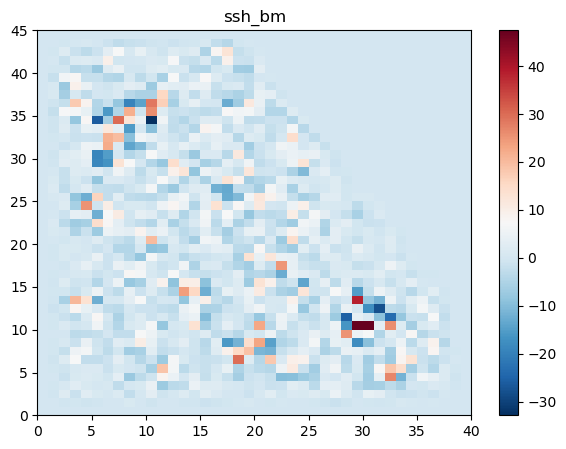

0.9999999999999992

super: MOD_SW1L_JAX
name_var: {'U': 'u_it', 'V': 'v_it', 'SSH': 'ssh_it'}
name_init_var: []
dir_model: None
dtmodel: 1200
time_scheme: rk4
bc_kind: 1d
w_waves: [0.00014376682471122976]
He_init: 0.7
He_data: None
Ntheta: 1
g: 9.81

Tangent test:
1E+00 1E+00
1E-01 5E-01
1E-02 6E-02
1E-03 7E-03
1E-04 7E-04
1E-05 7E-05
1E-06 7E-06
1E-07 7E-07
1E-08 8E-08
1E-09 5E-07
Adjoint test:


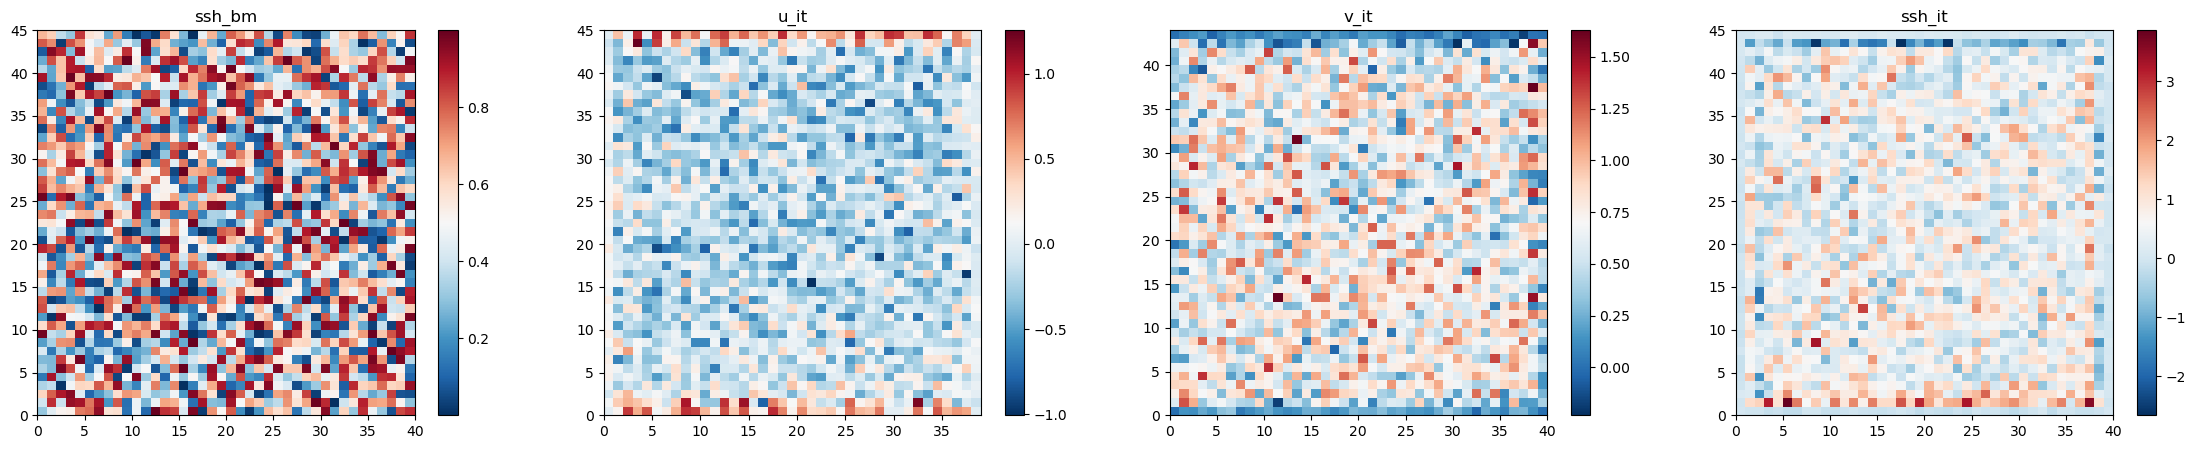

0.9999999999999999

Tangent test:
1E+00 1E+00
1E-01 4E-01
1E-02 5E-02
1E-03 5E-03
1E-04 5E-04
1E-05 5E-05
1E-06 5E-06
1E-07 5E-07
1E-08 8E-08
1E-09 5E-07
Adjoint test:


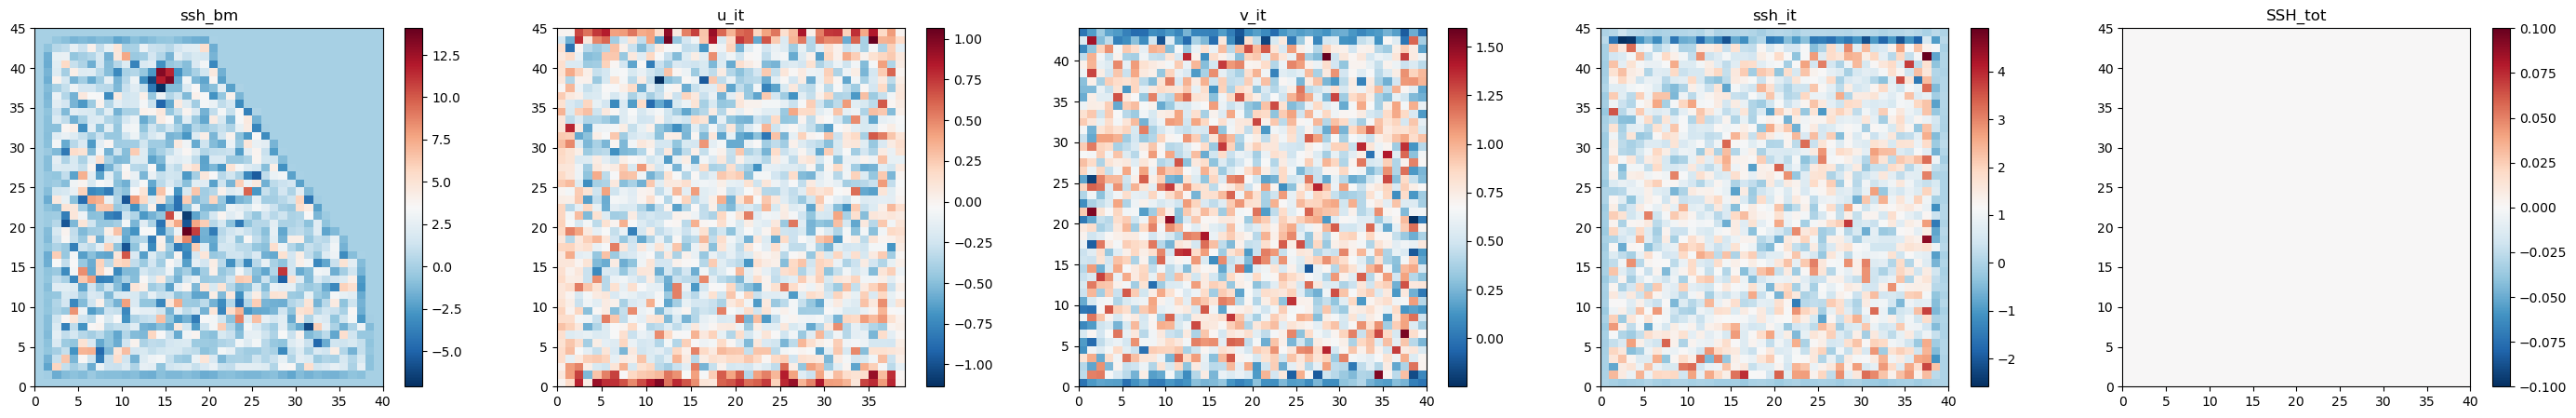

0.9999999999999999


In [5]:
from src import mod as mod
Model = mod.Model(config,State)

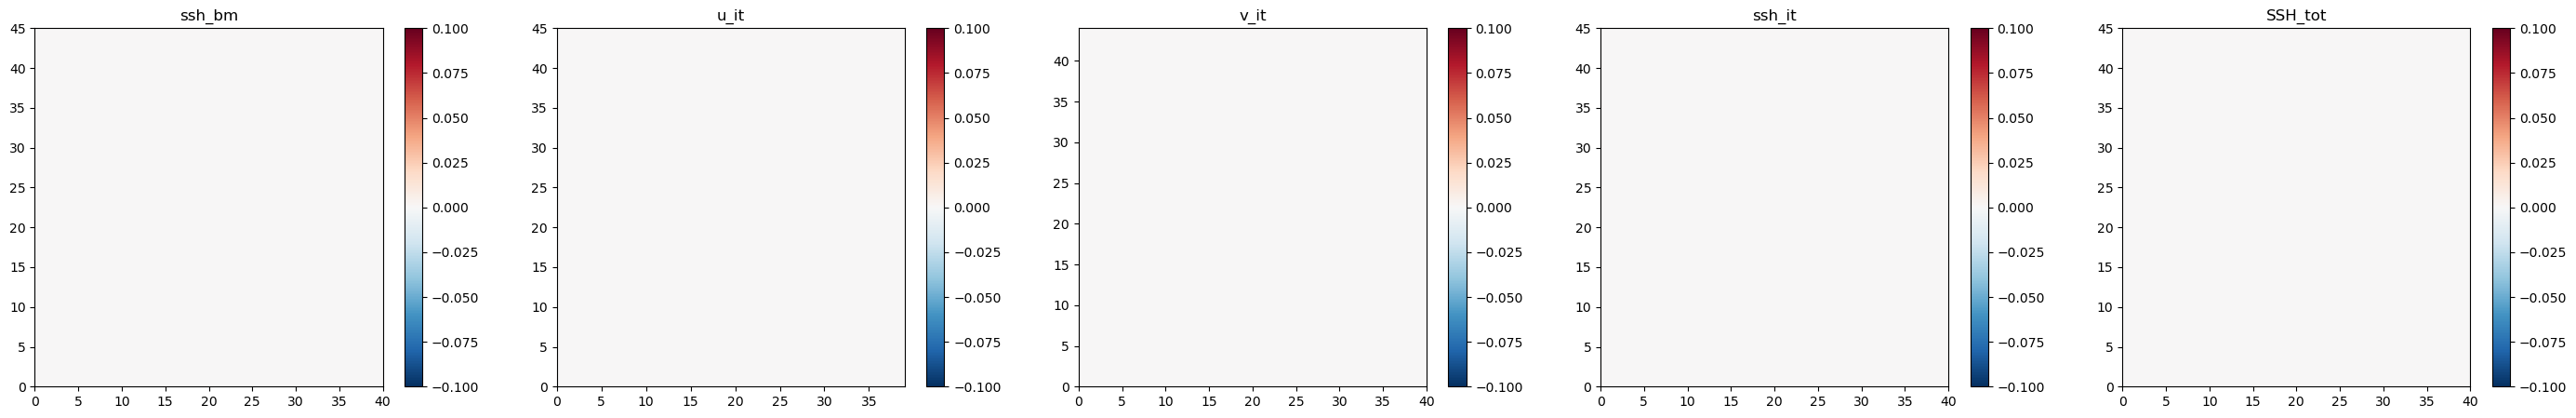

In [6]:
State.plot()

In [7]:
Model.name_var

{'SSH': 'SSH_tot'}

In [8]:
from src import bc as bc
Bc = bc.Bc(config)

## Observations

In [9]:
from src import obs as obs
dict_obs = obs.Obs(config,State)

Observation information will be saved in dict_obs_SWOT_ALG_C2_H2G_J2G_J2N_J3_S3A_20120201_20120210_230_240_30_39.txt
Reading dict_obs_SWOT_ALG_C2_H2G_J2G_J2N_J3_S3A_20120201_20120210_230_240_30_39.txt from previous run


In [10]:
from src import obsop as obsop
Obsop = obsop.Obsop(config,State,dict_obs,Model)

super: OBSOP_INTERP
path_save: None
compute_op: False
Npix: 4
mask_coast: False
dist_coast: 100
mask_borders: False



## Reduced Basis

In [11]:
from src import basis as basis
Basis = basis.Basis(config, State)

super: BASIS_BM
name_mod_var: ssh_bm
flux: False
save_wave_basis: False
wavelet_init: True
facns: 1.0
facnlt: 2.0
npsp: 3.5
facpsp: 1.5
lmin: 80
lmax: 970.0
lmeso: 300
tmeso: 10
sloptdec: -1.0
factdec: 0.5
tdecmin: 0.0
tdecmax: 20.0
facQ: 1
Qmax: 0.03
slopQ: -2

super: BASIS_IT
Nwaves: 1
Ntheta: 1
sigma_B_He: 0.2
sigma_B_bc: 0.01
facgauss: 3.5
D_He: 200
T_He: 20
D_bc: 200
T_bc: 20
facB_bc_coast: 1
facB_He_coast: 1
scalemodes: None
scalew_igws: None



## Assimilation

super: INV_4DVAR
compute_test: True
path_init_4Dvar: None
restart_4Dvar: False
gtol: 0.001
maxiter: 10
opt_method: L-BFGS-B
save_minimization: False
timestep_checkpoint: 6:00:00
sigma_R: 0.01
sigma_B: None
prec: True
prescribe_background: False
bkg_satellite: None
path_background: None
bkg_Kdiffus: 0.0
name_bkg_var: res
bkg_maxiter: 30
bkg_maxiter_inner: 10
largescale_error_ratio: 1
only_largescale: False

--> 85 checkpoints to evaluate the cost function
lambda=9.7E+02 nlocs=4.0E+00 tdec=1.0E+01 Q=2.1E-02
lambda=6.8E+02 nlocs=4.0E+00 tdec=1.0E+01 Q=2.1E-02
lambda=4.8E+02 nlocs=8.0E+00 tdec=7.9E+00 Q=2.1E-02
lambda=3.3E+02 nlocs=9.0E+00 tdec=5.6E+00 Q=2.1E-02
lambda=2.3E+02 nlocs=1.6E+01 tdec=3.9E+00 Q=1.3E-02
lambda=1.6E+02 nlocs=2.5E+01 tdec=2.7E+00 Q=6.3E-03
lambda=1.1E+02 nlocs=4.2E+01 tdec=1.9E+00 Q=3.1E-03
lambda=8.0E+01 nlocs=7.2E+01 tdec=1.3E+00 Q=1.5E-03
reduced order: 153000 --> 41382
 reduced factor: 3
nHe: 3000
nbc: 3240
reduced order: 239700 --> 6240
 reduced factor: 38
Gra

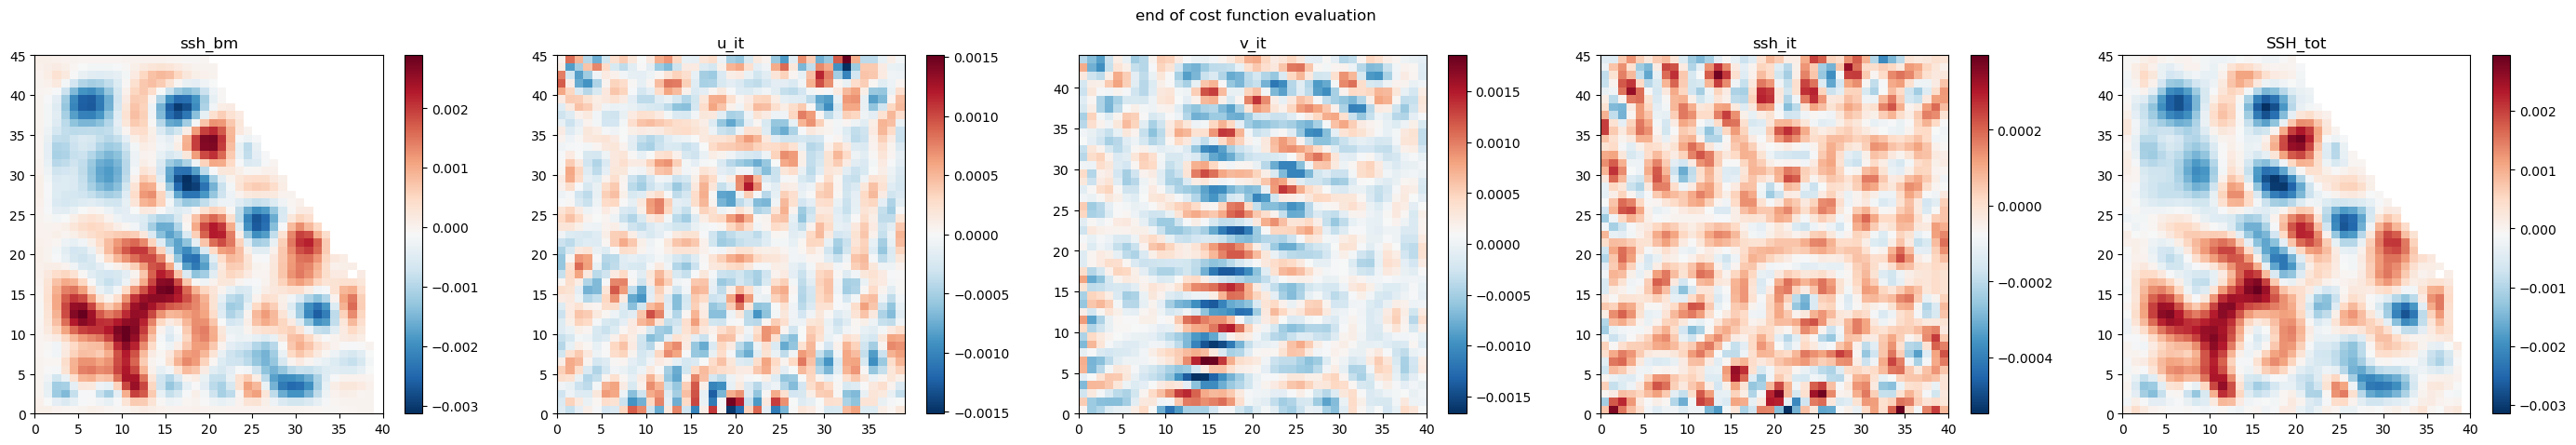

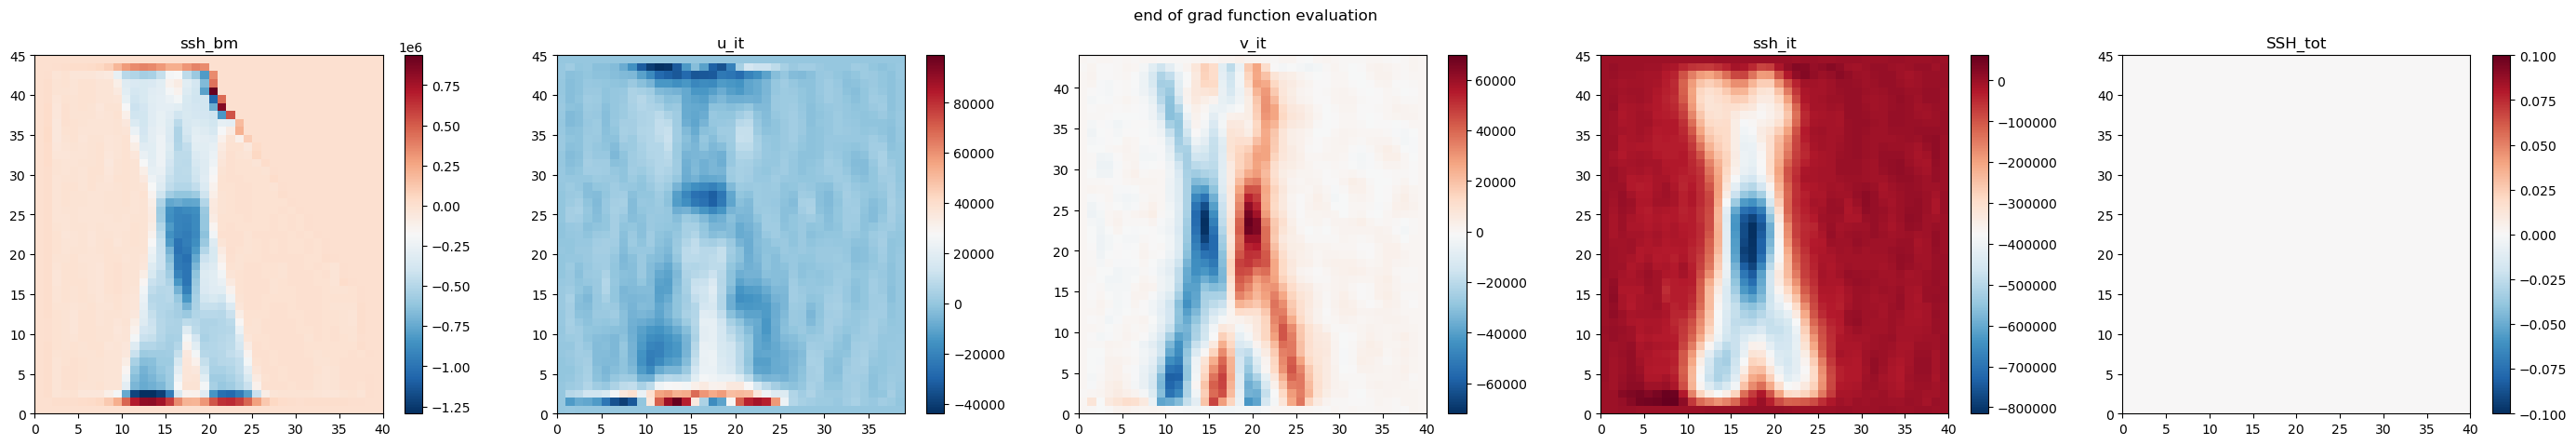

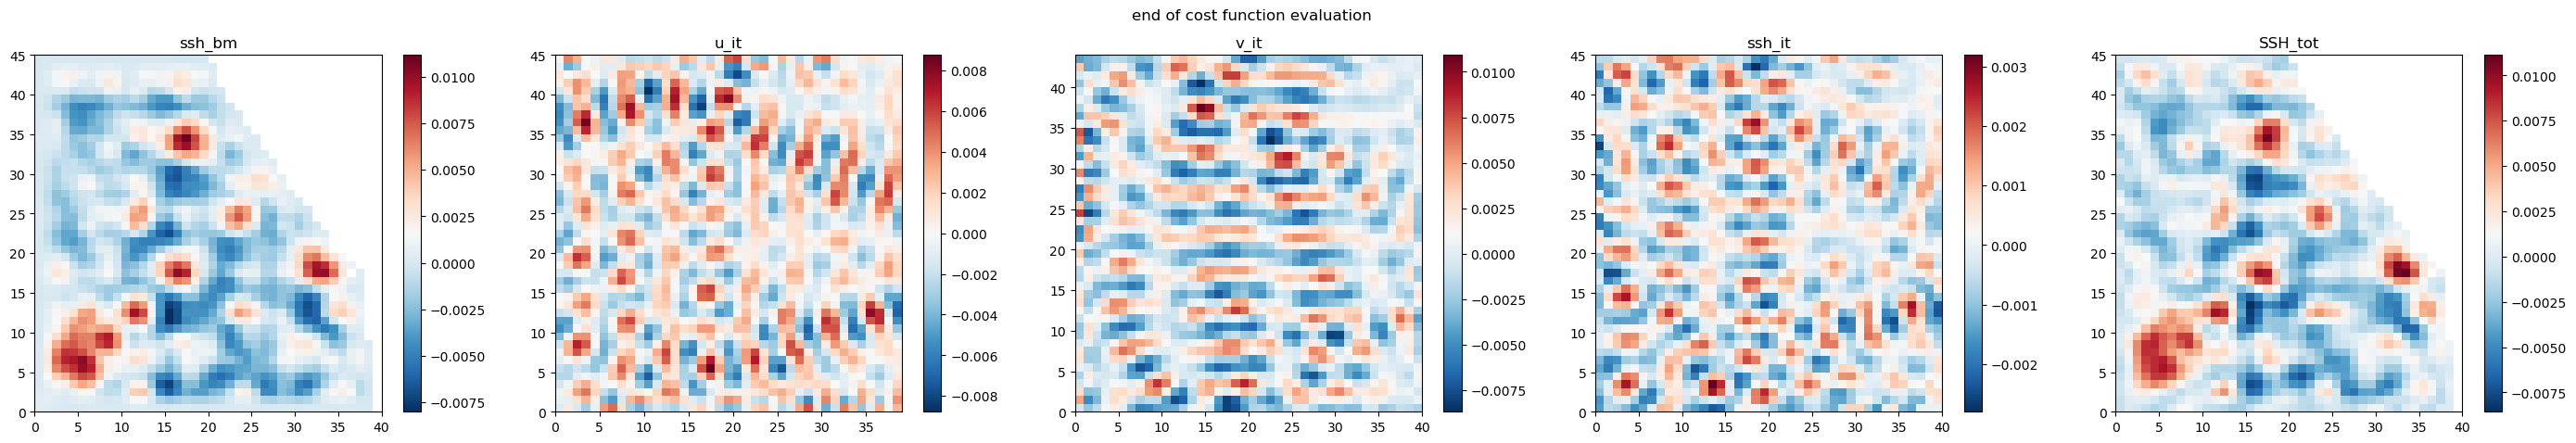

1.0E+00 , 2.91E-02


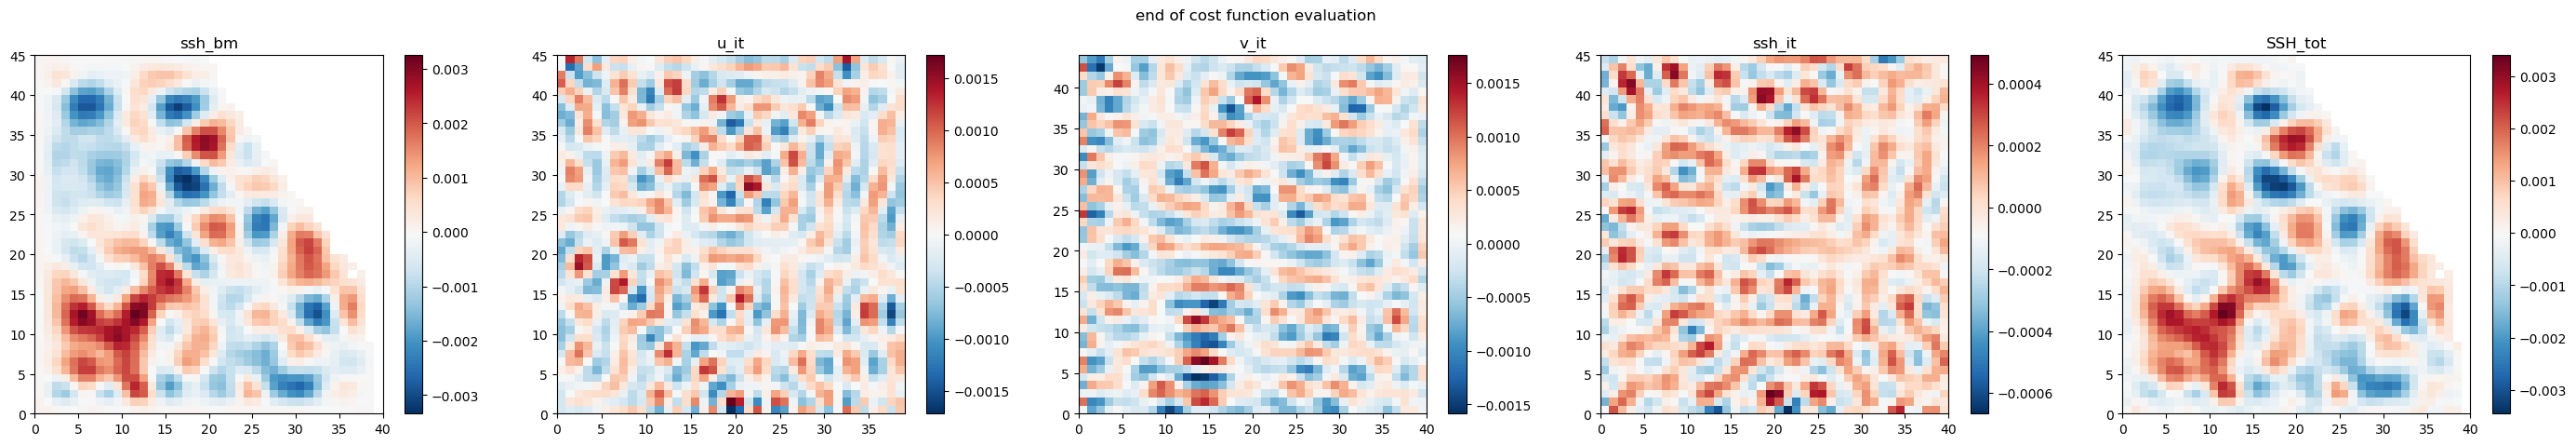

1.0E-01 , 2.51E-03


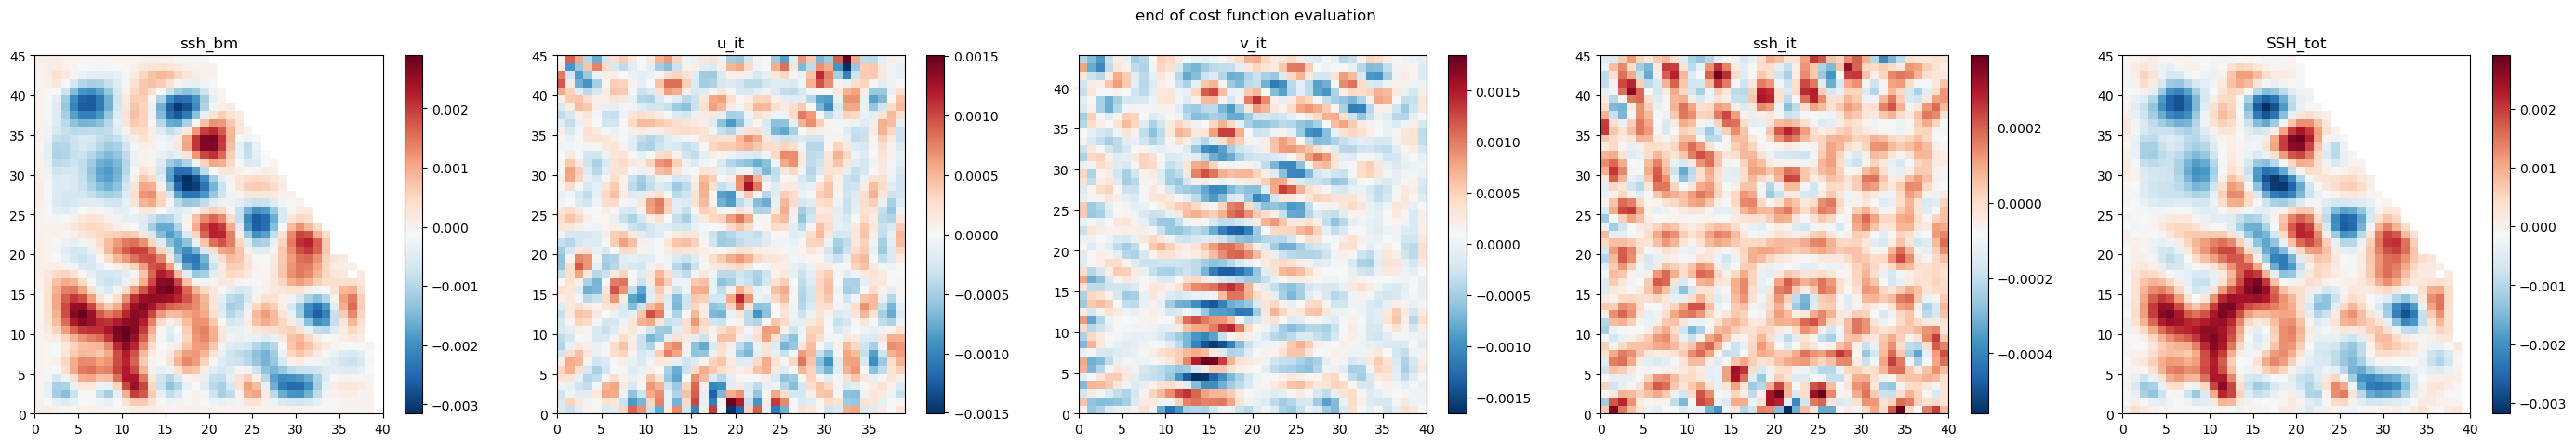

1.0E-02 , 2.50E-04


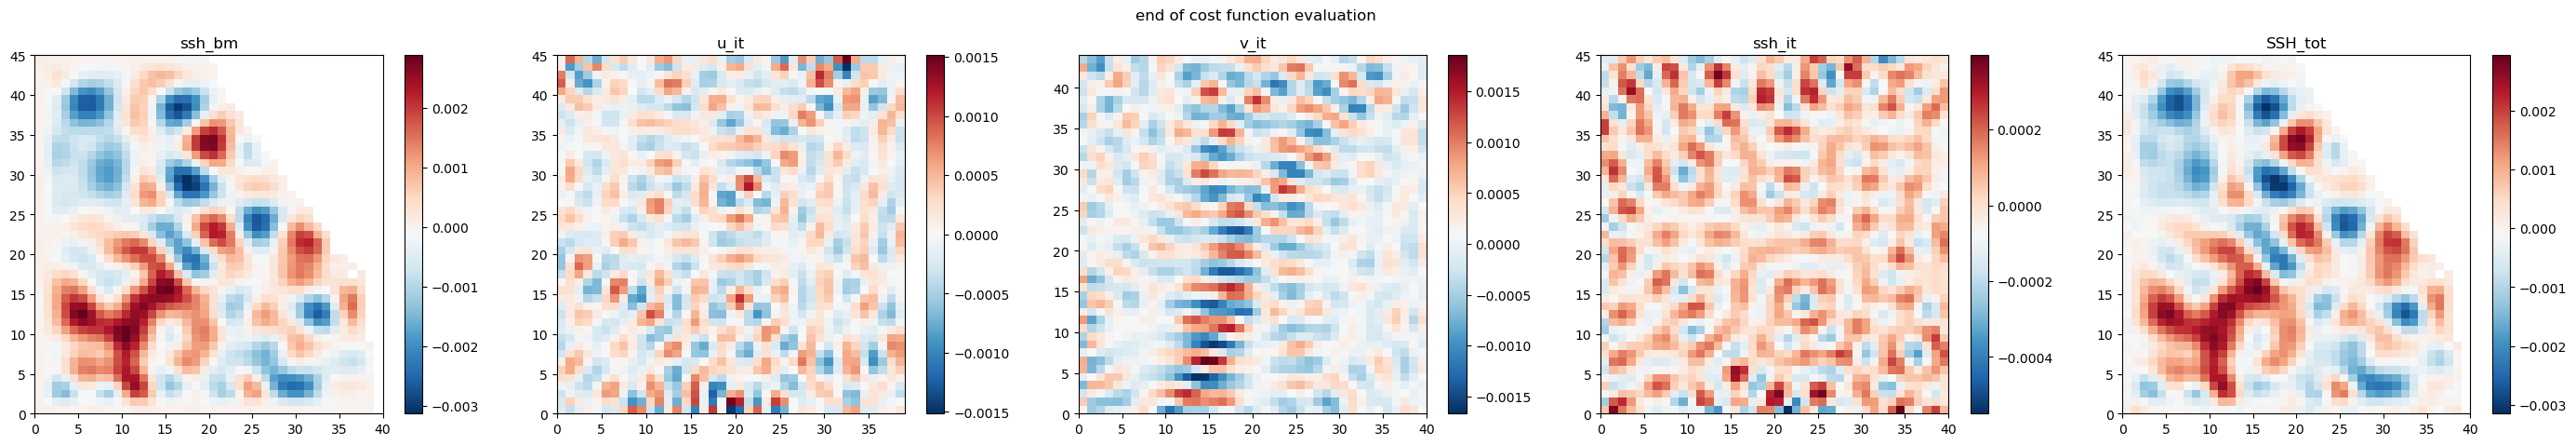

1.0E-03 , 2.26E-05


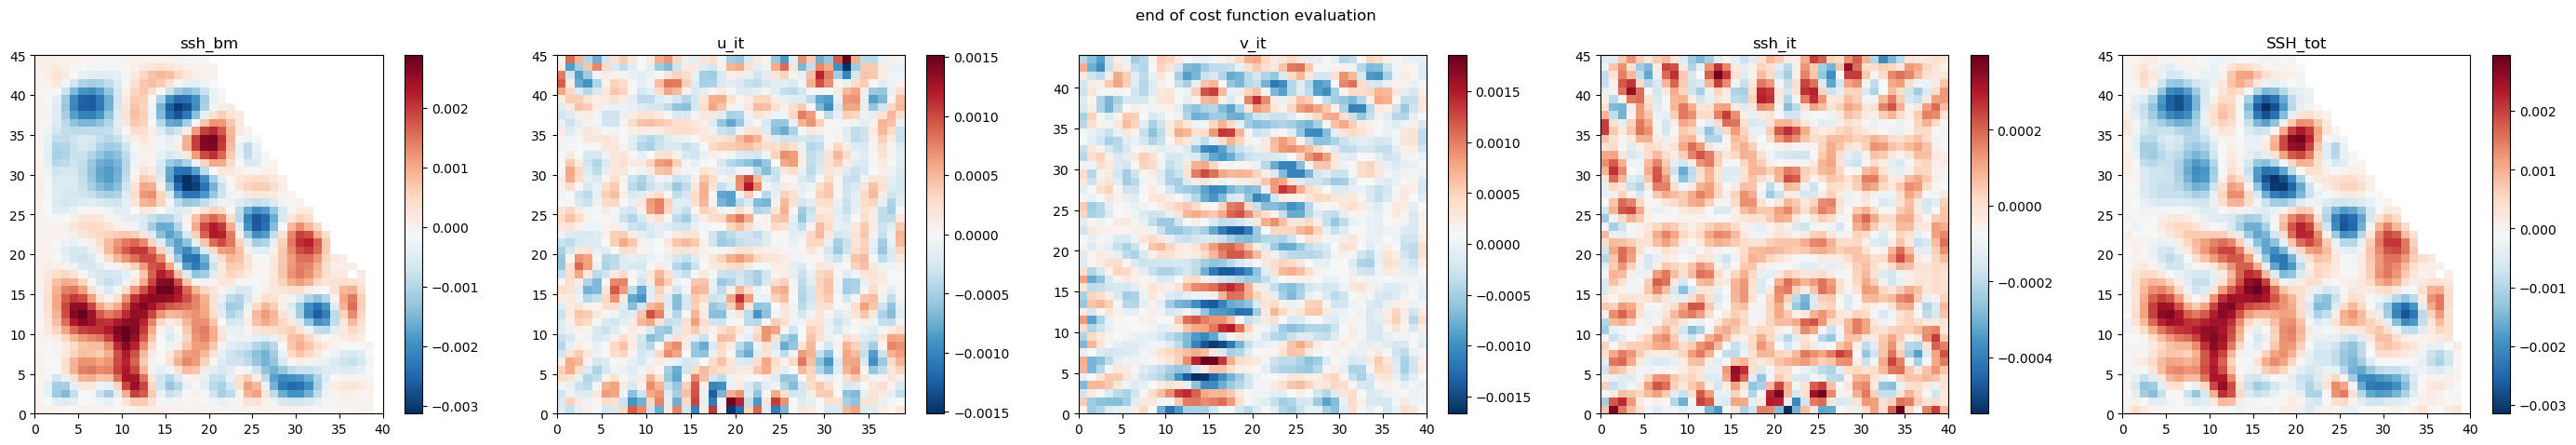

1.0E-04 , 2.52E-06


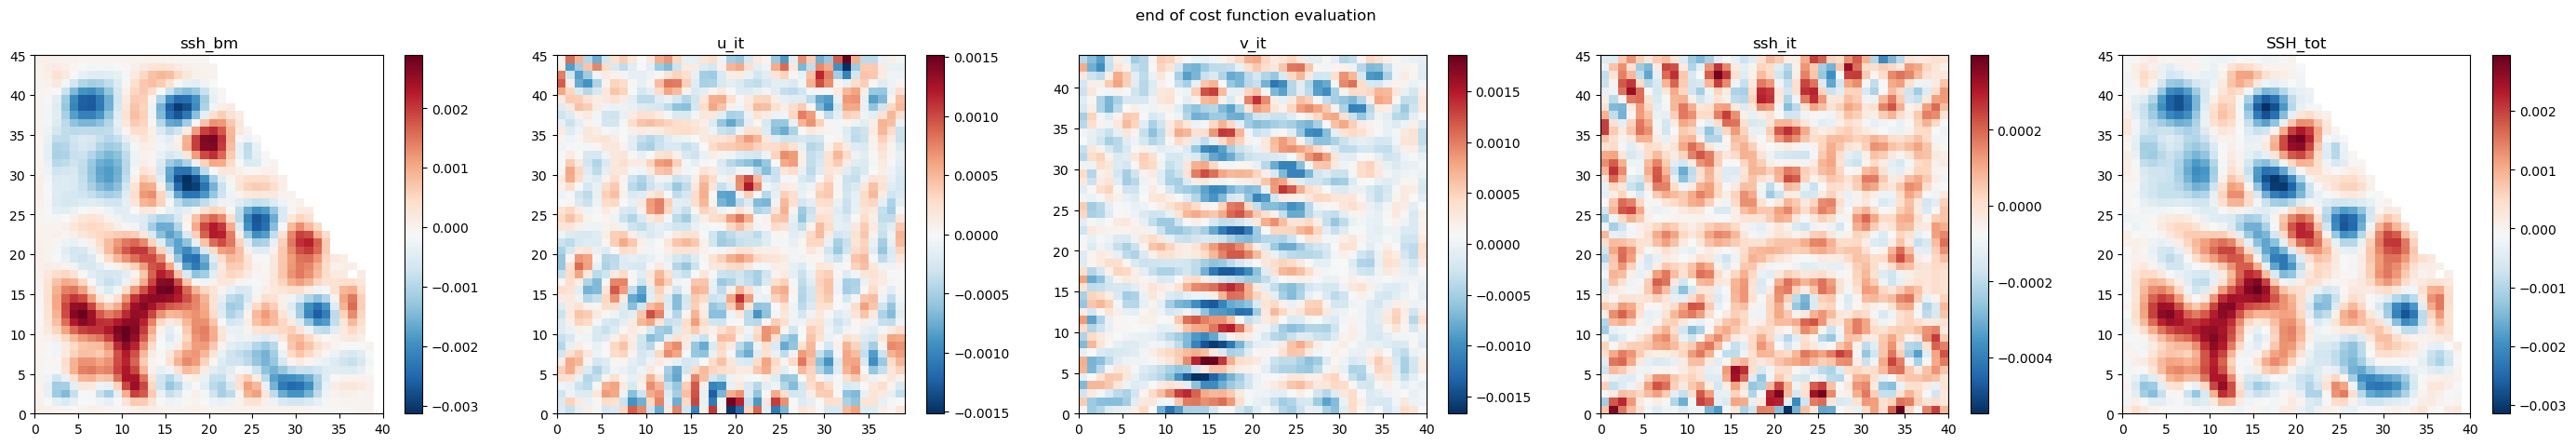

1.0E-05 , 2.59E-07


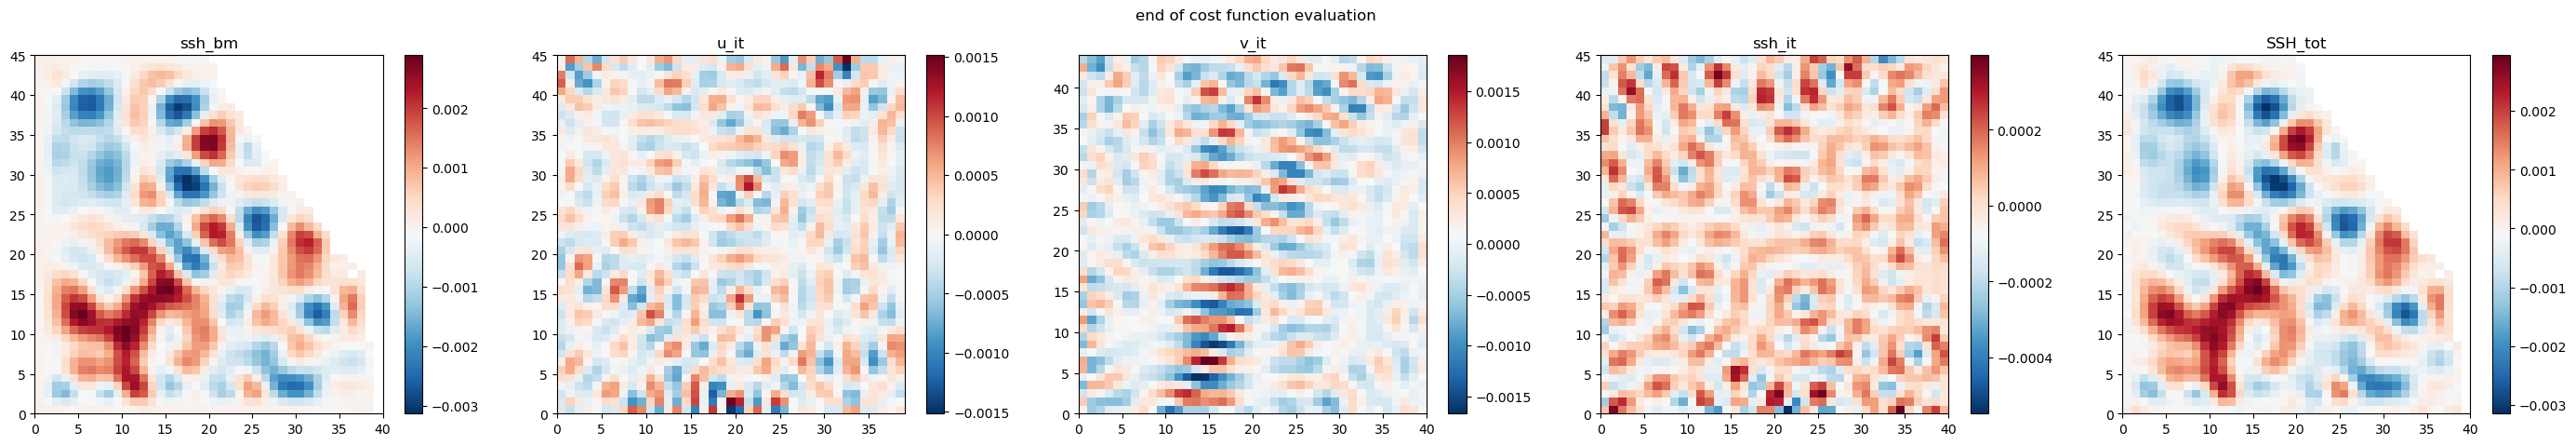

1.0E-06 , 8.98E-09


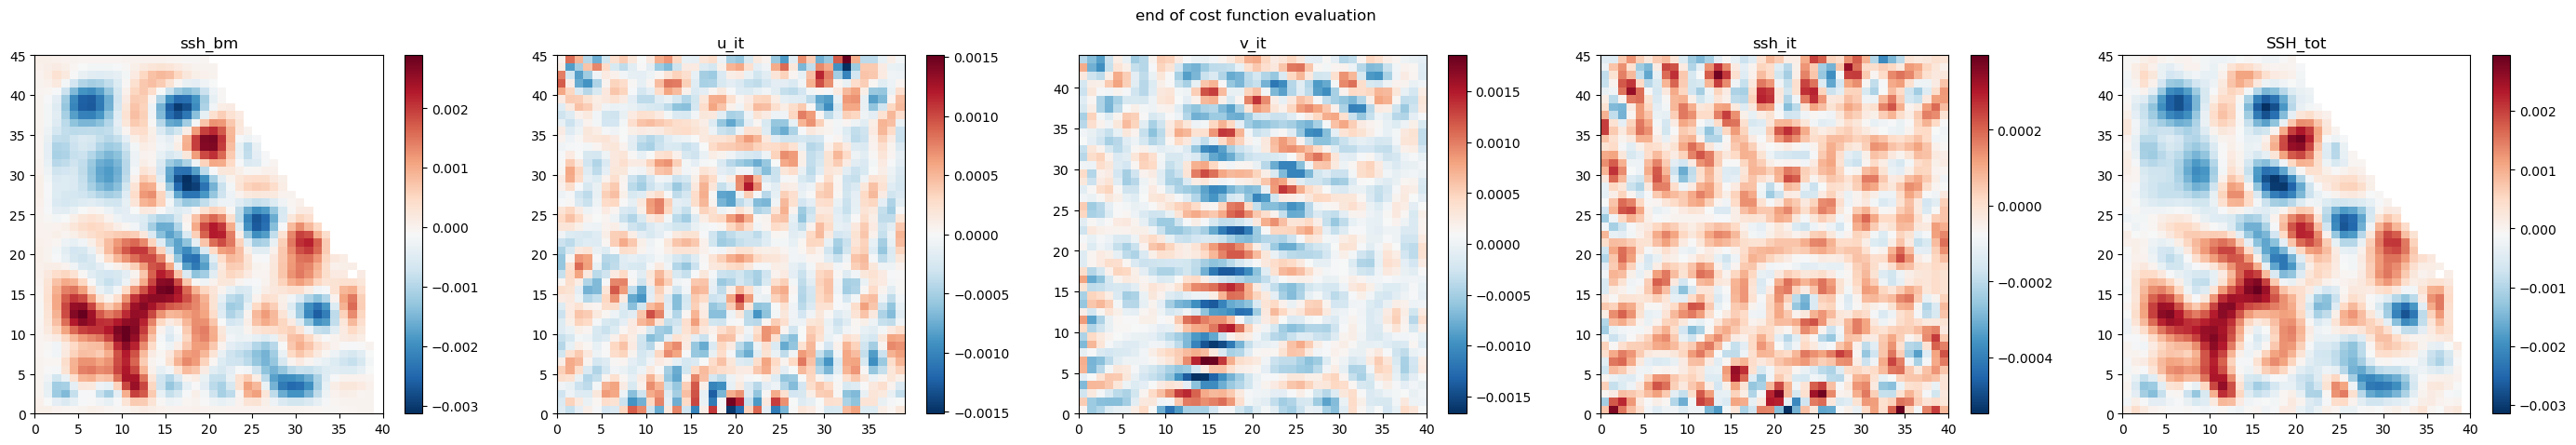

1.0E-07 , 7.04E-07


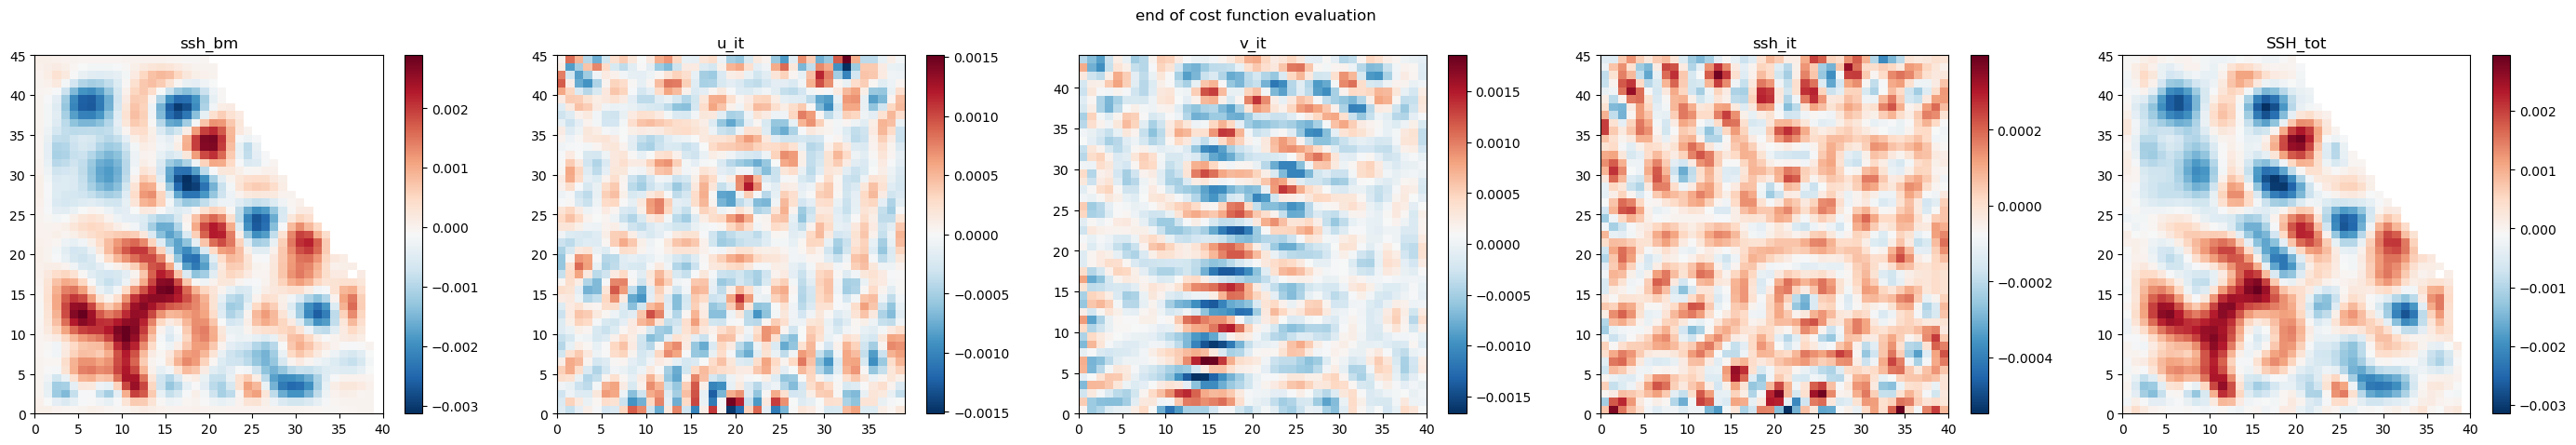

1.0E-08 , 1.51E-05


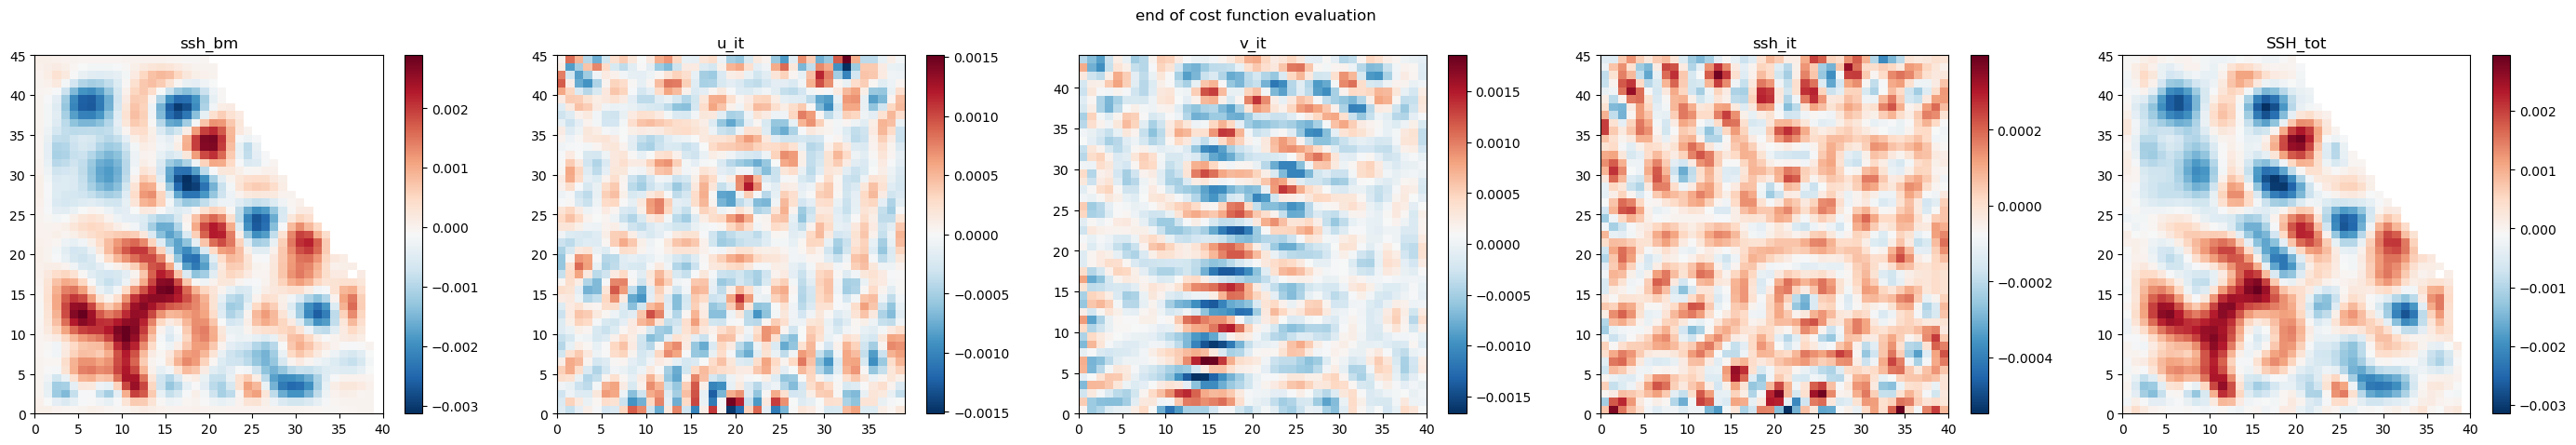

1.0E-09 , 9.23E-05

*** Minimization ***



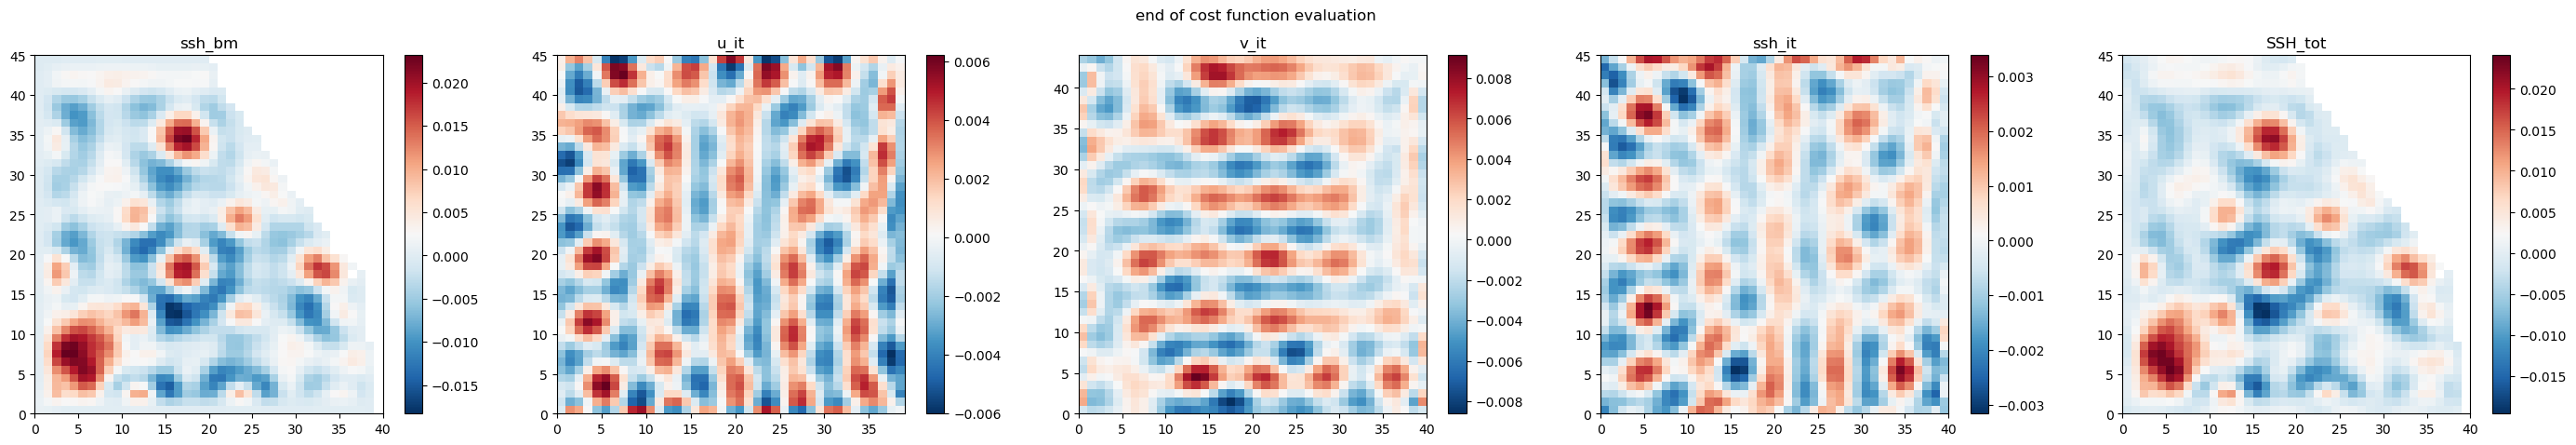

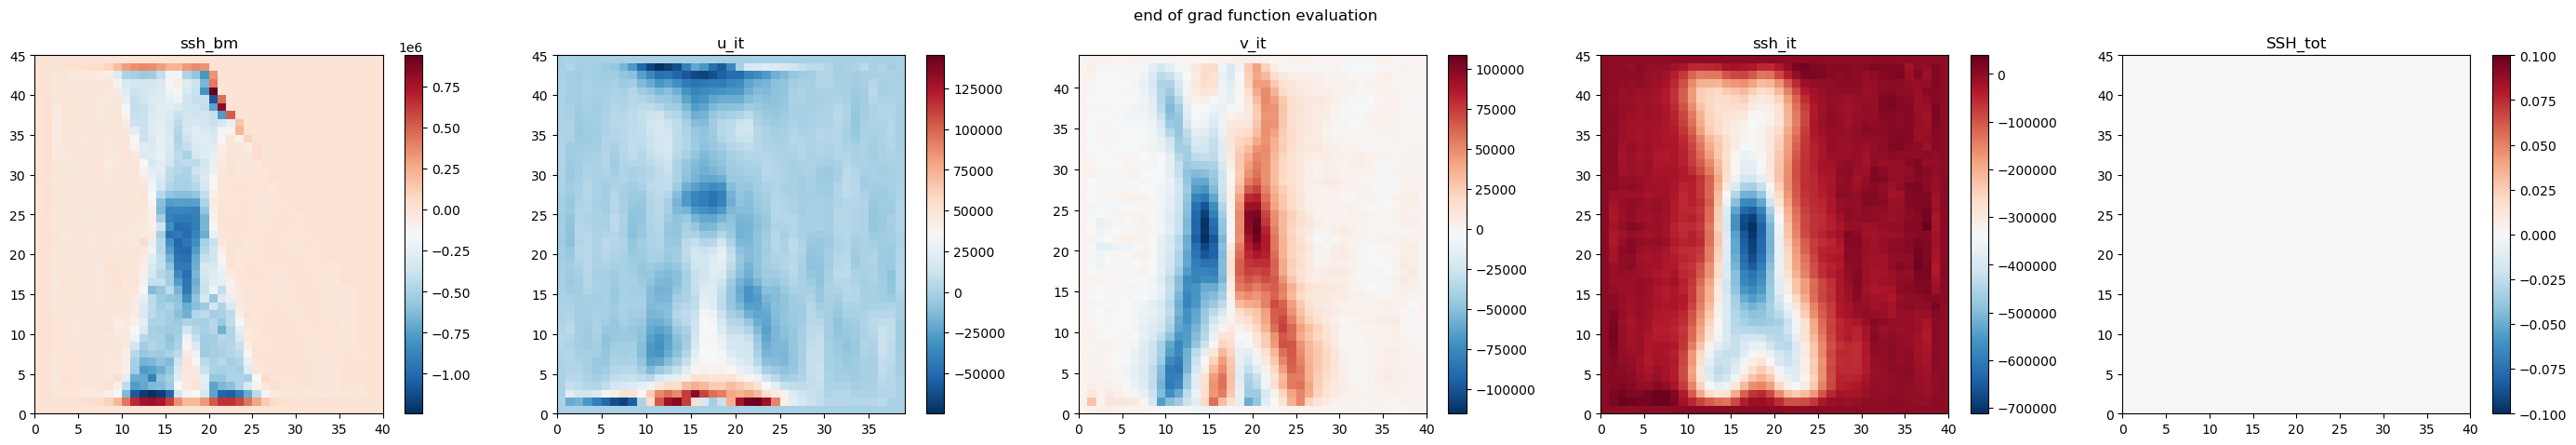

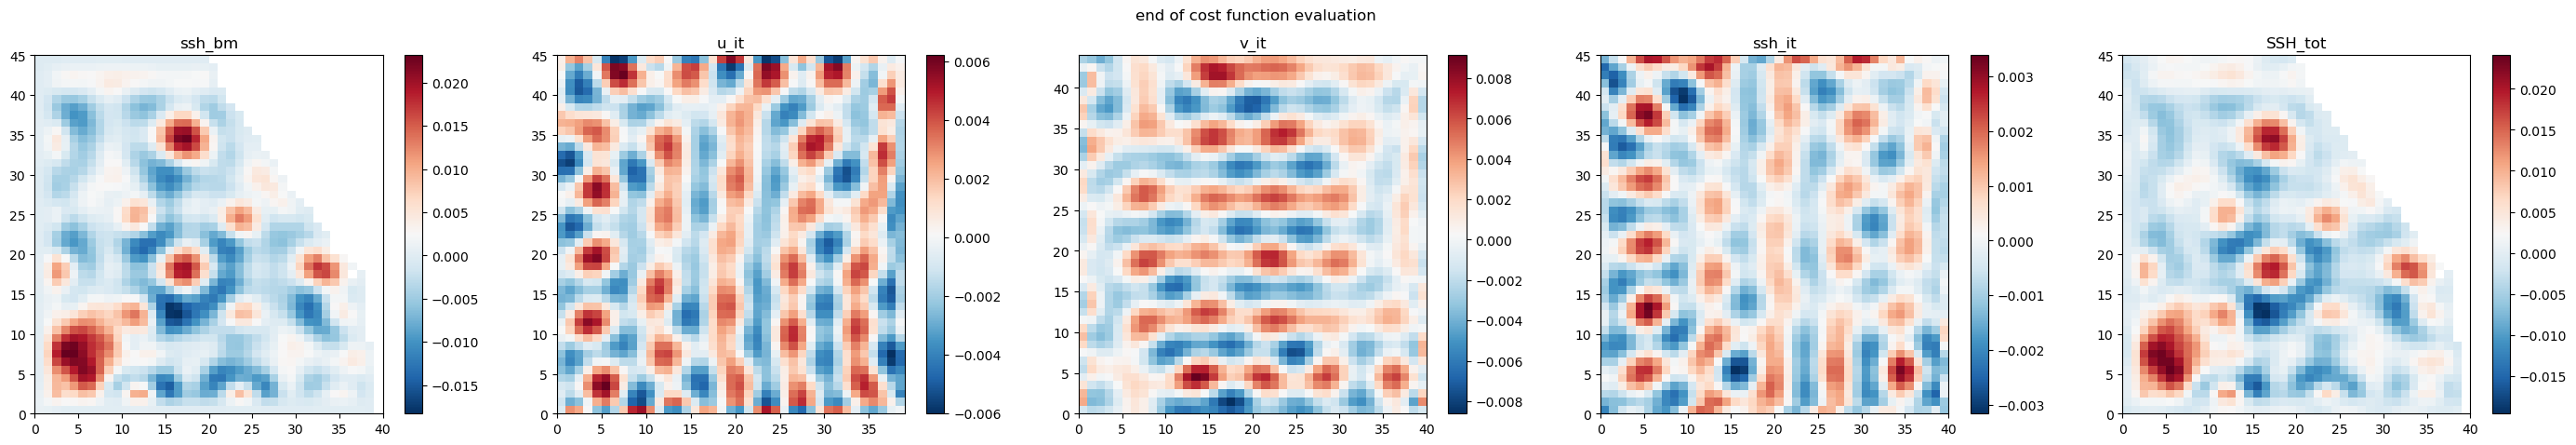

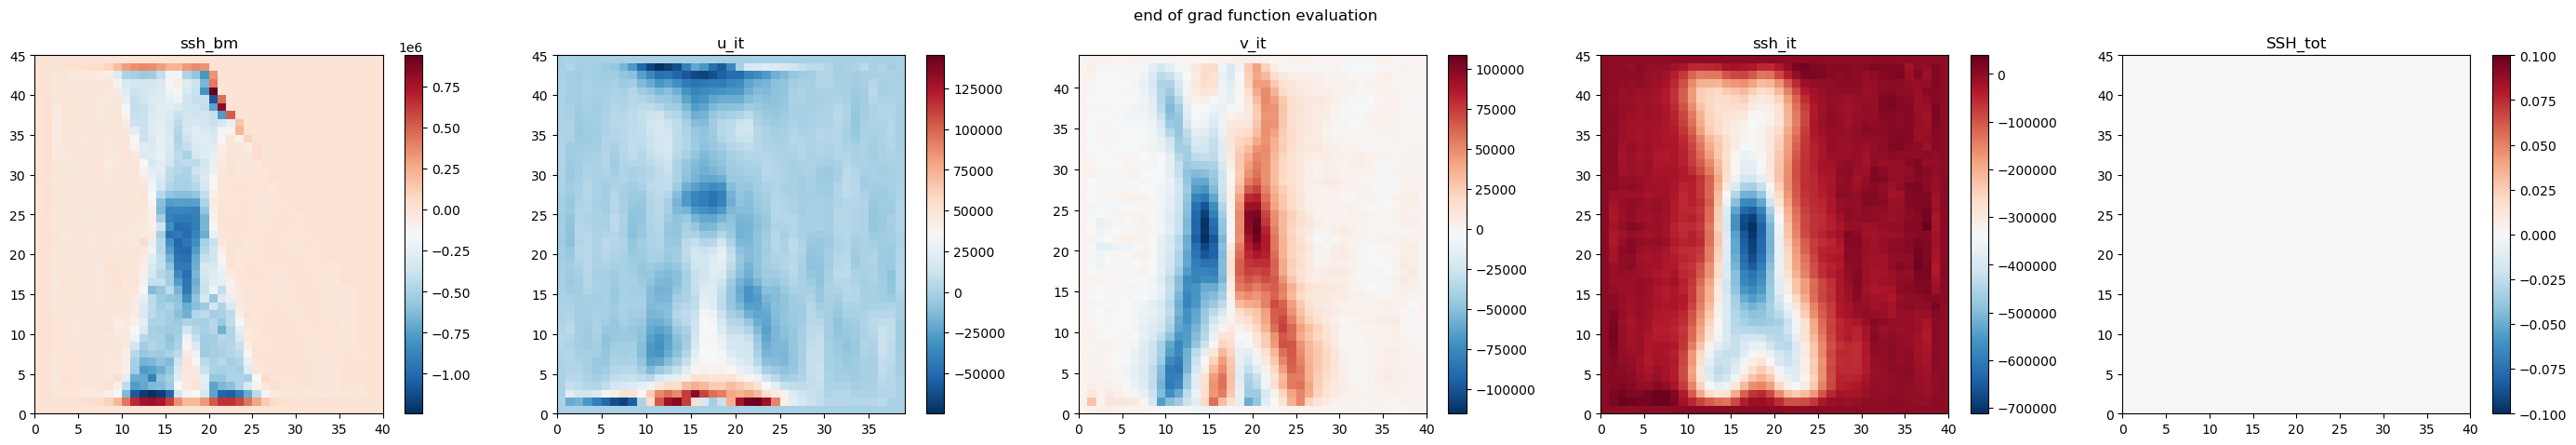

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        47622     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97546D+07    |proj g|=  2.89420D+06


 This problem is unconstrained.


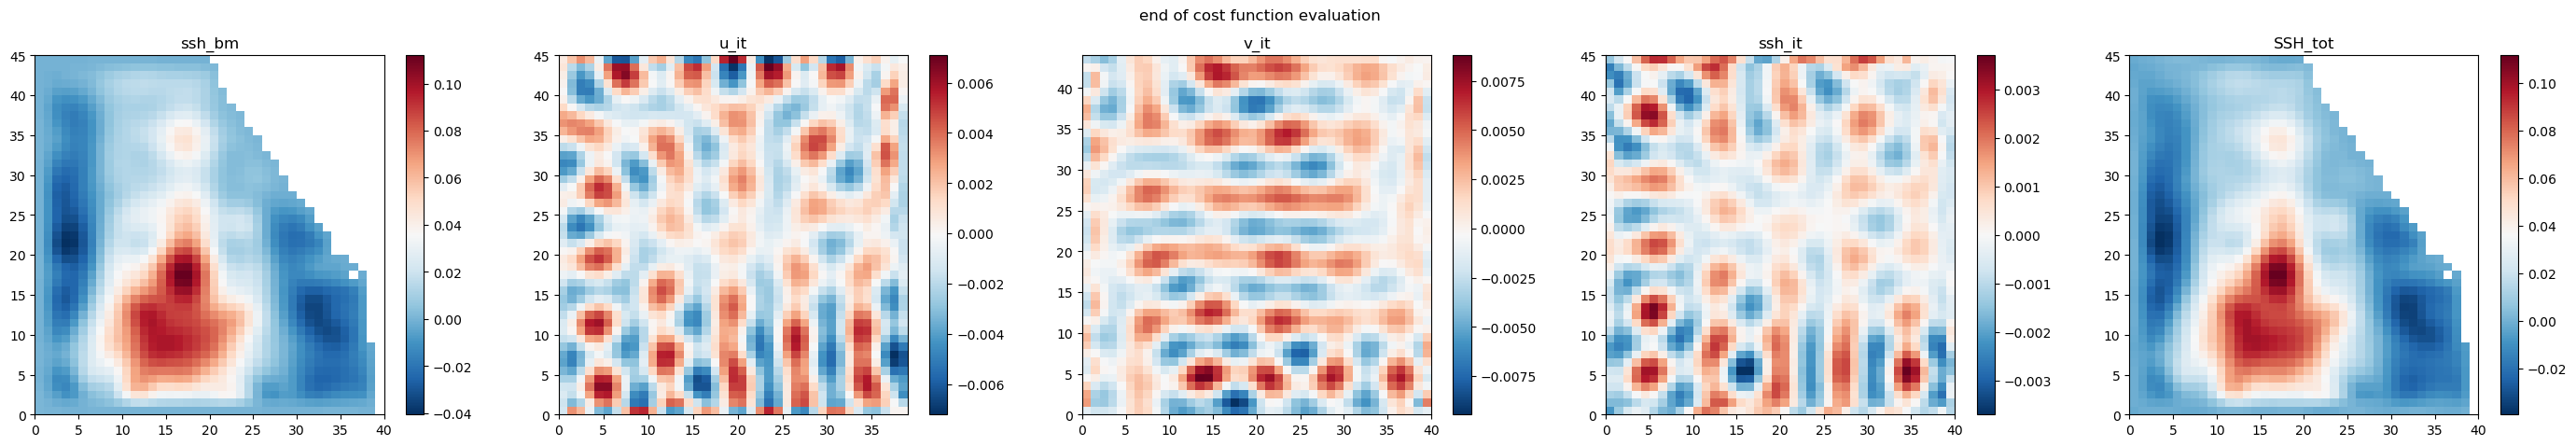

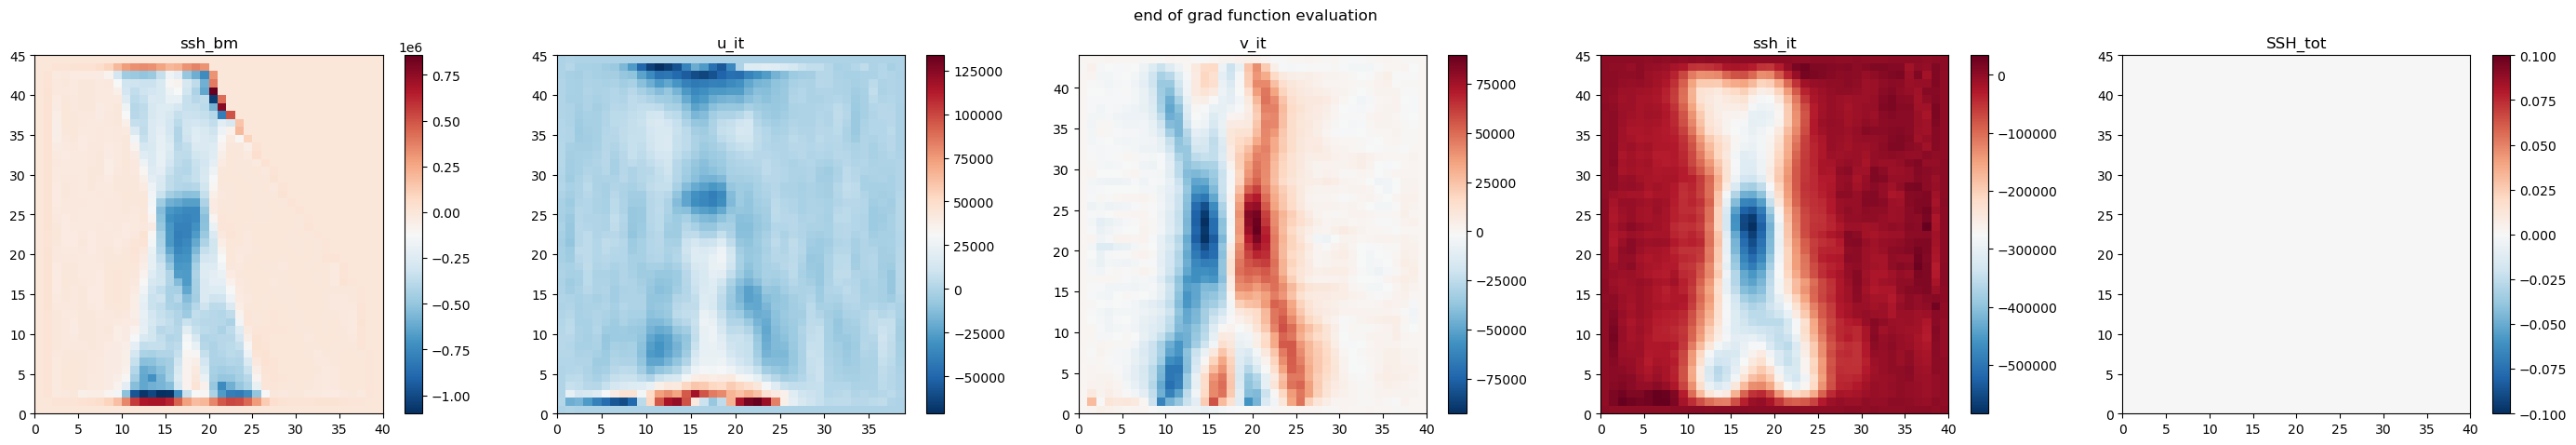


At iterate    1    f=  2.16050D+07    |proj g|=  2.32093D+06


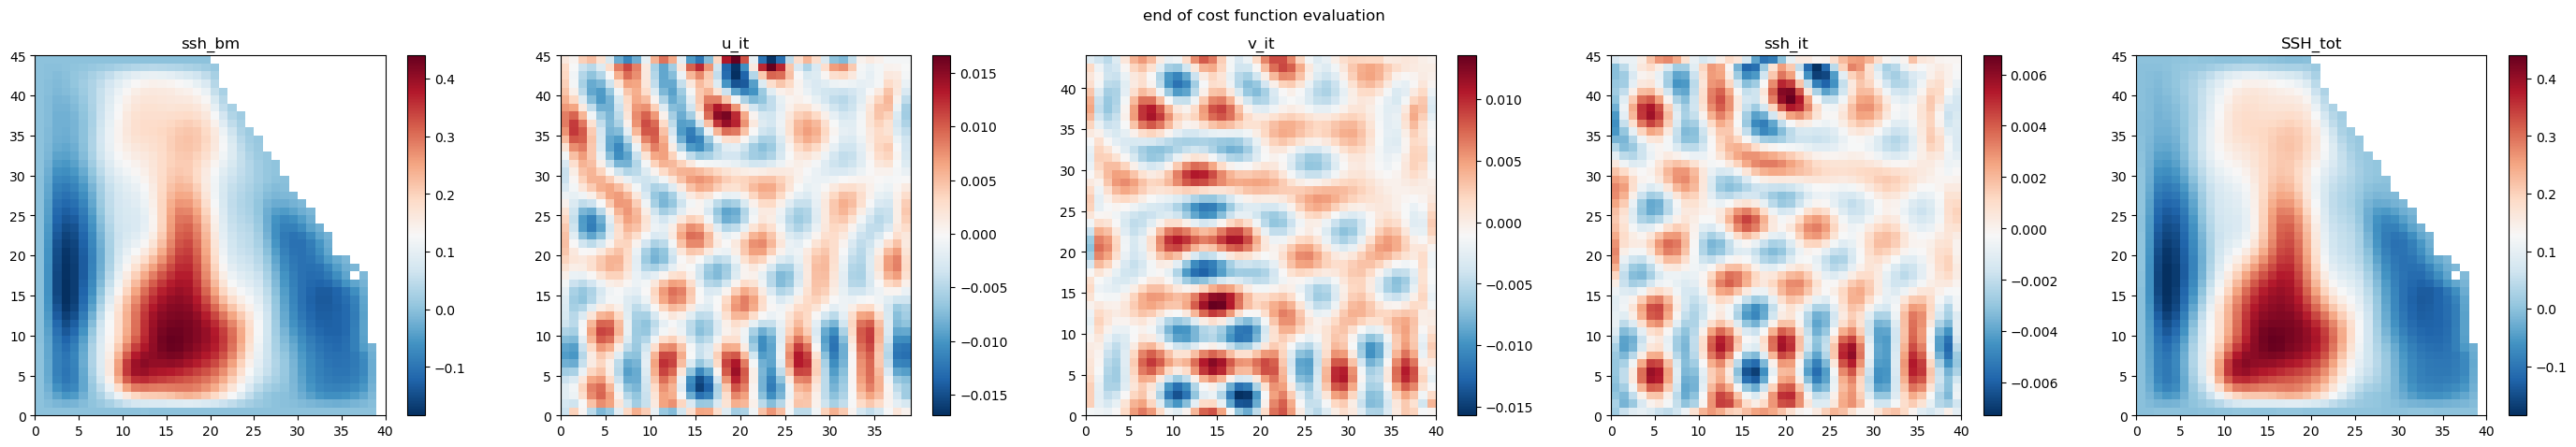

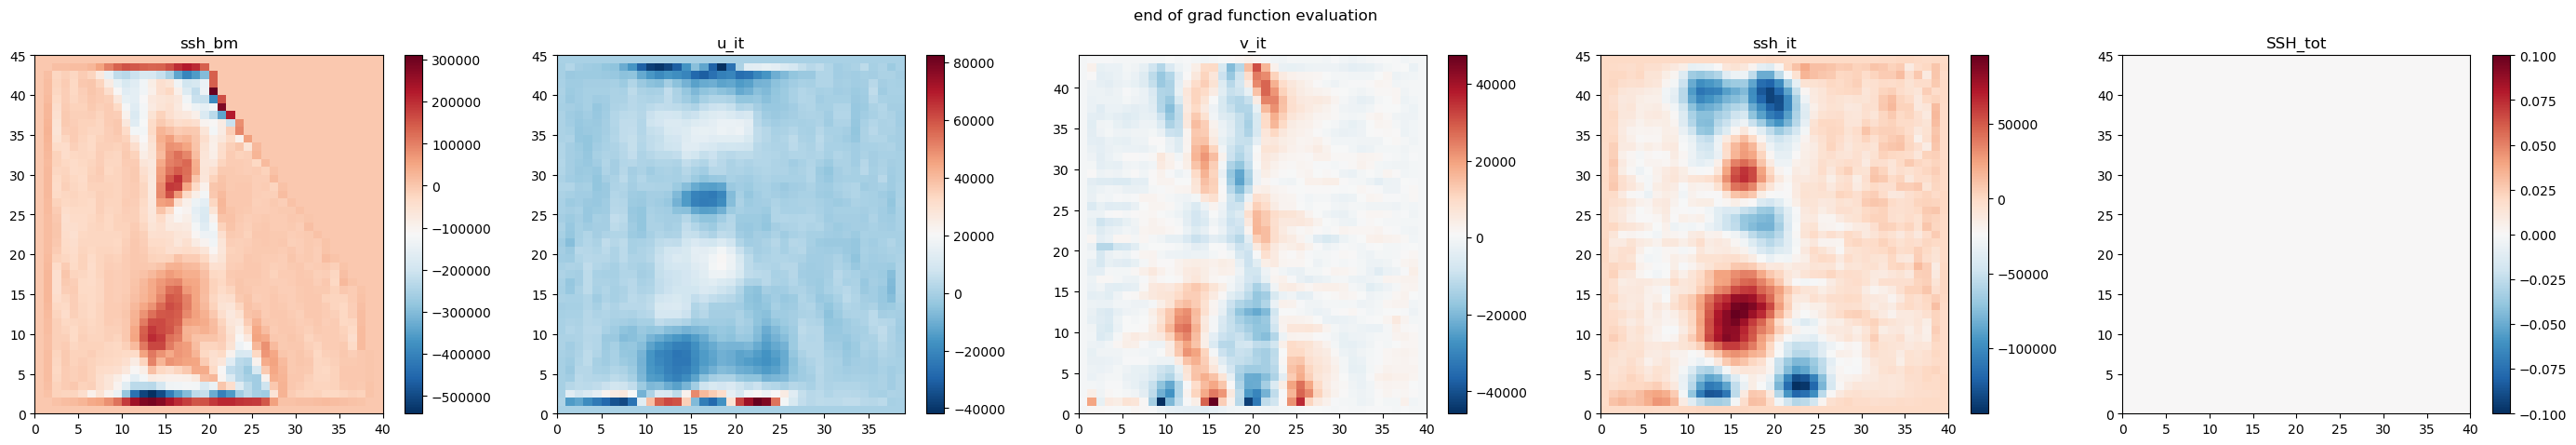


At iterate    2    f=  6.47980D+06    |proj g|=  2.05910D+05


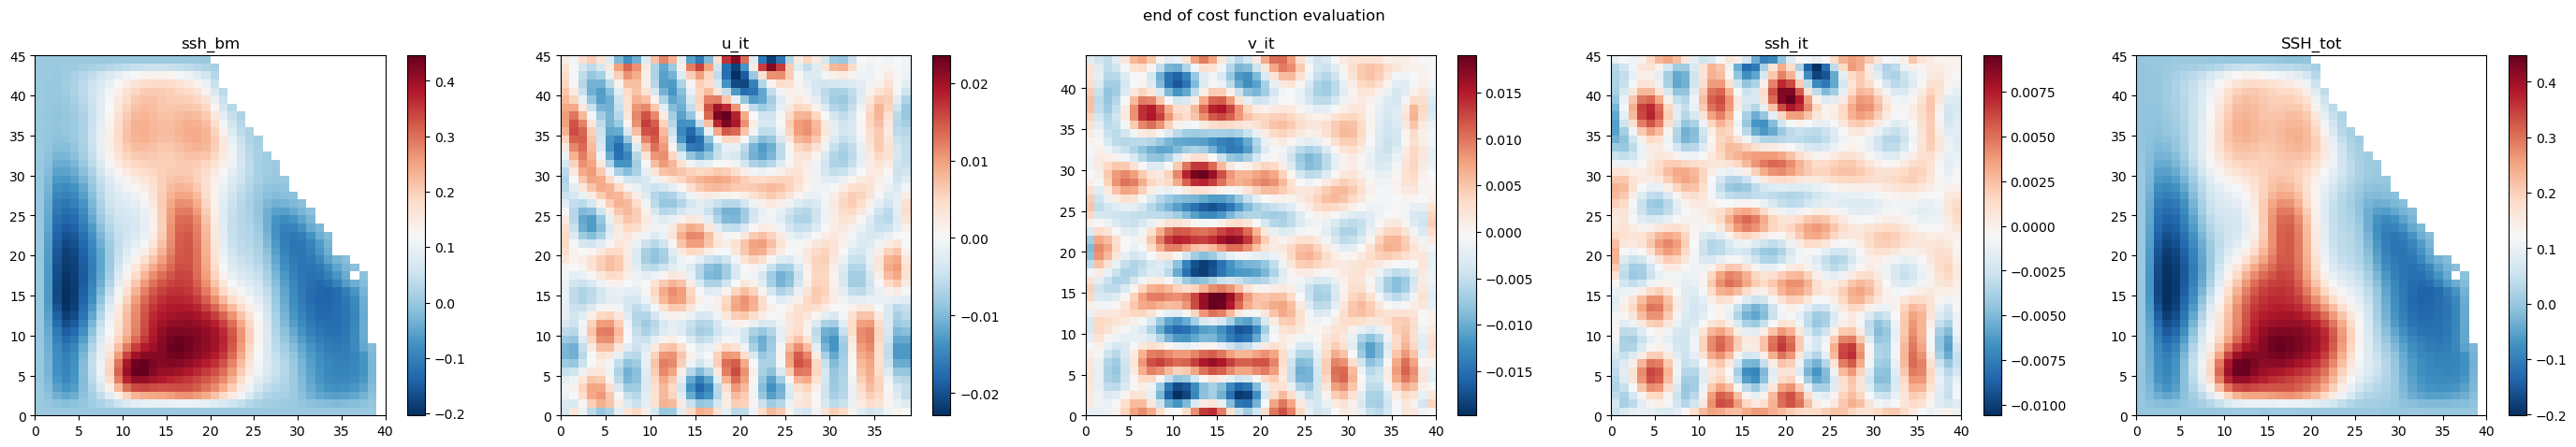

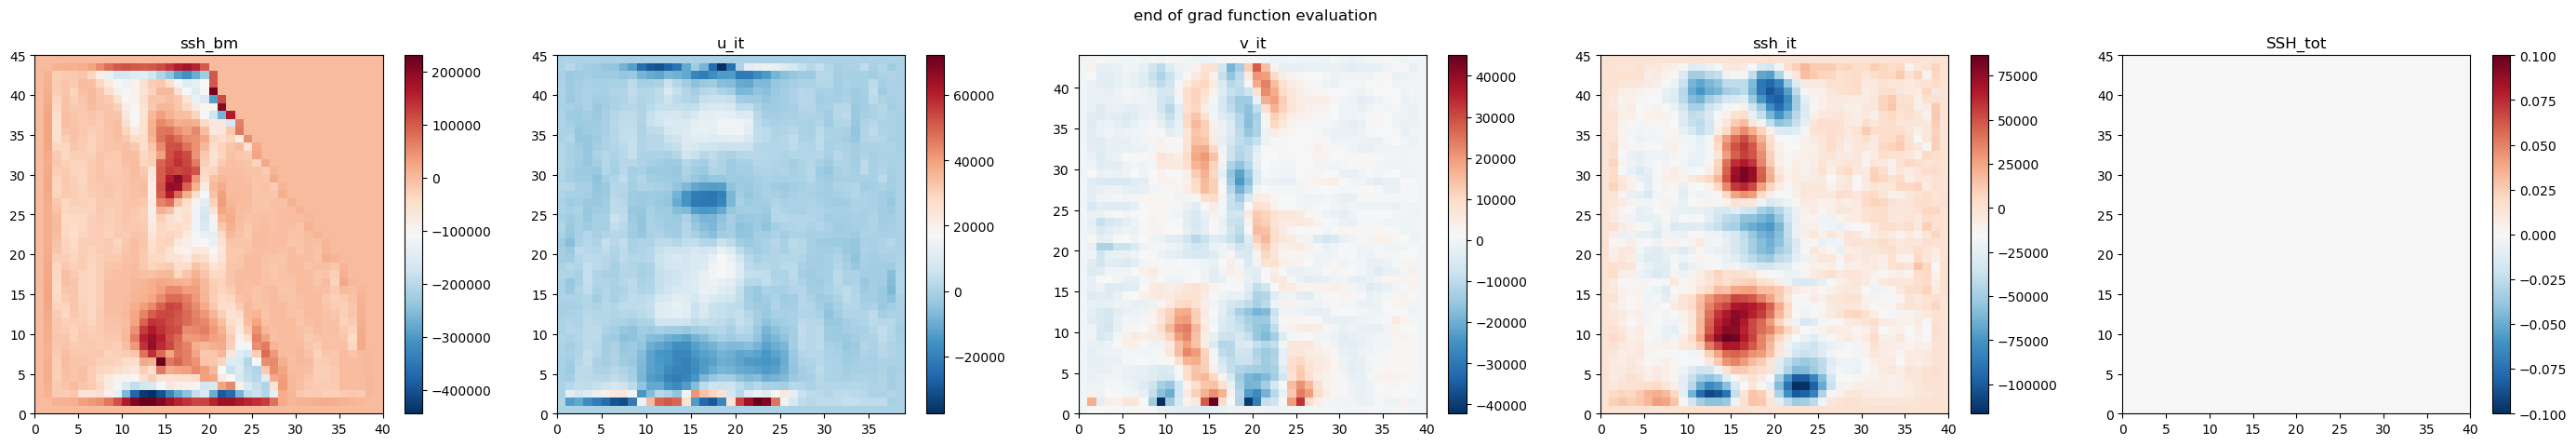


At iterate    3    f=  5.68632D+06    |proj g|=  1.21602D+05


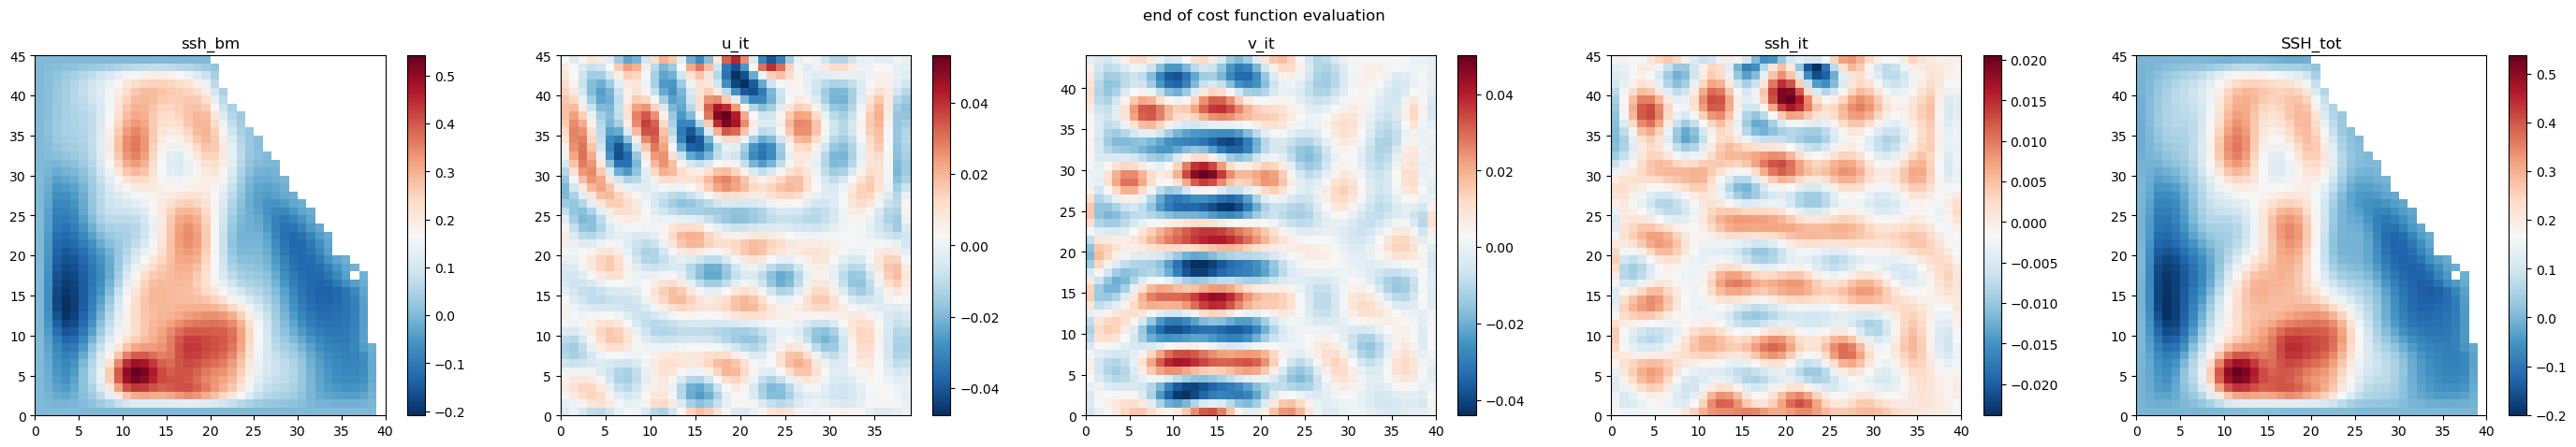

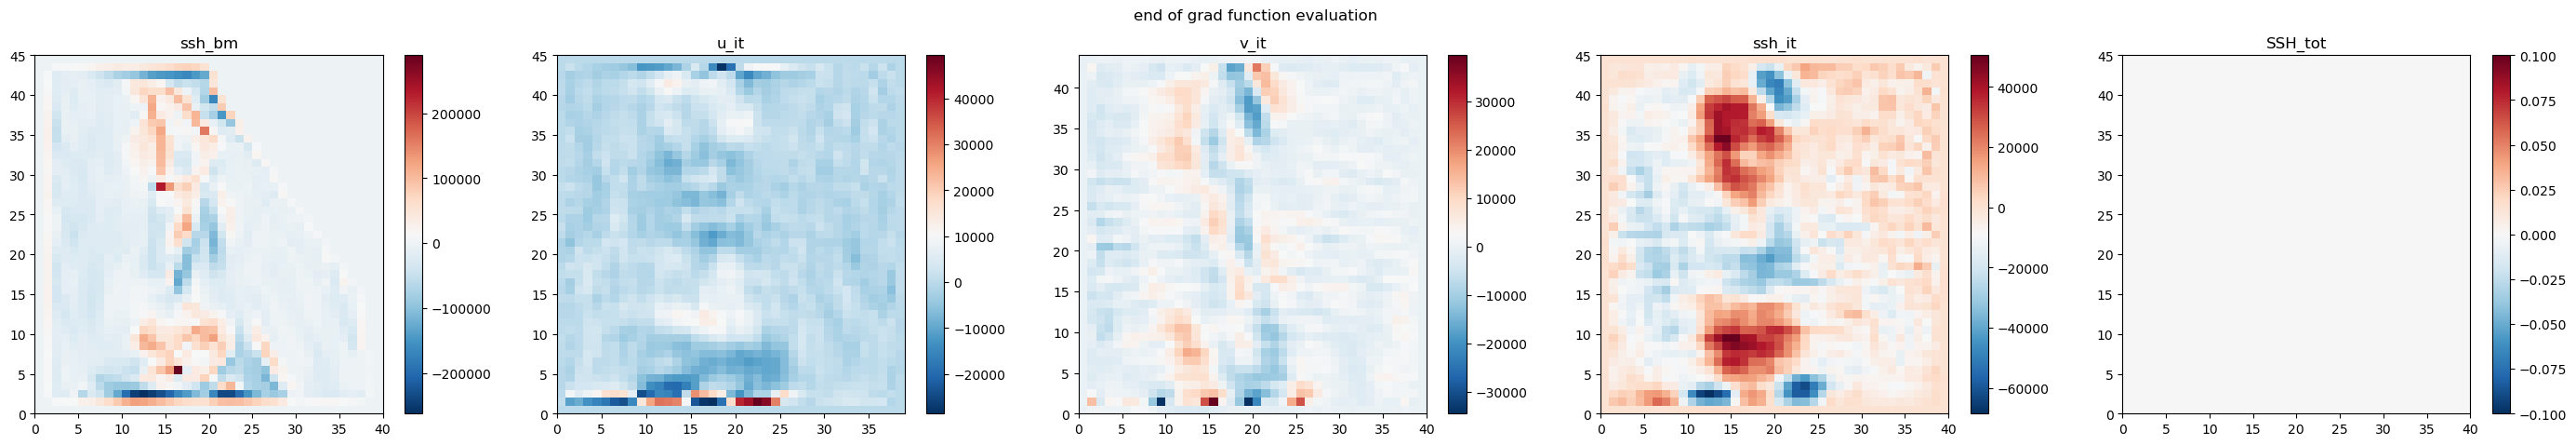


At iterate    4    f=  4.41484D+06    |proj g|=  1.03352D+05


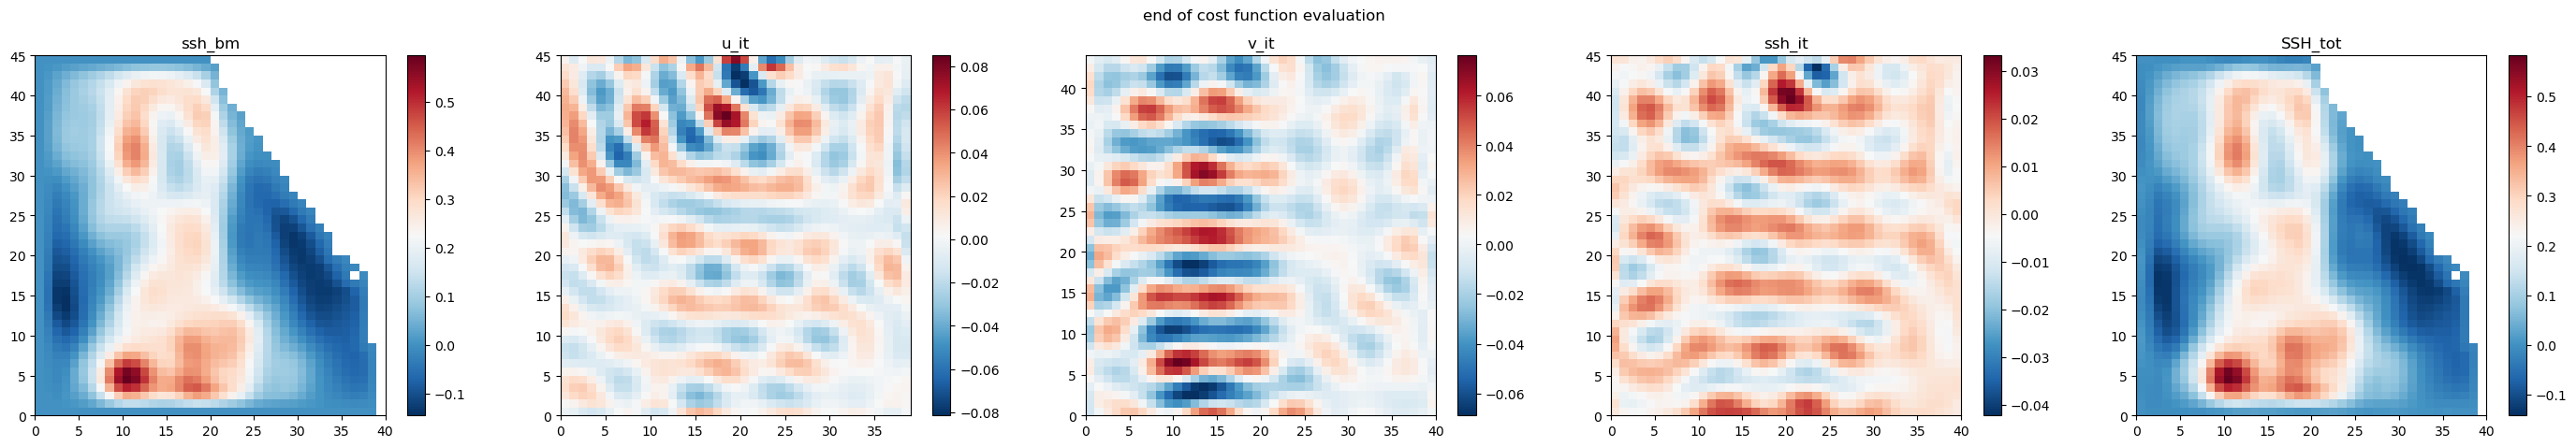

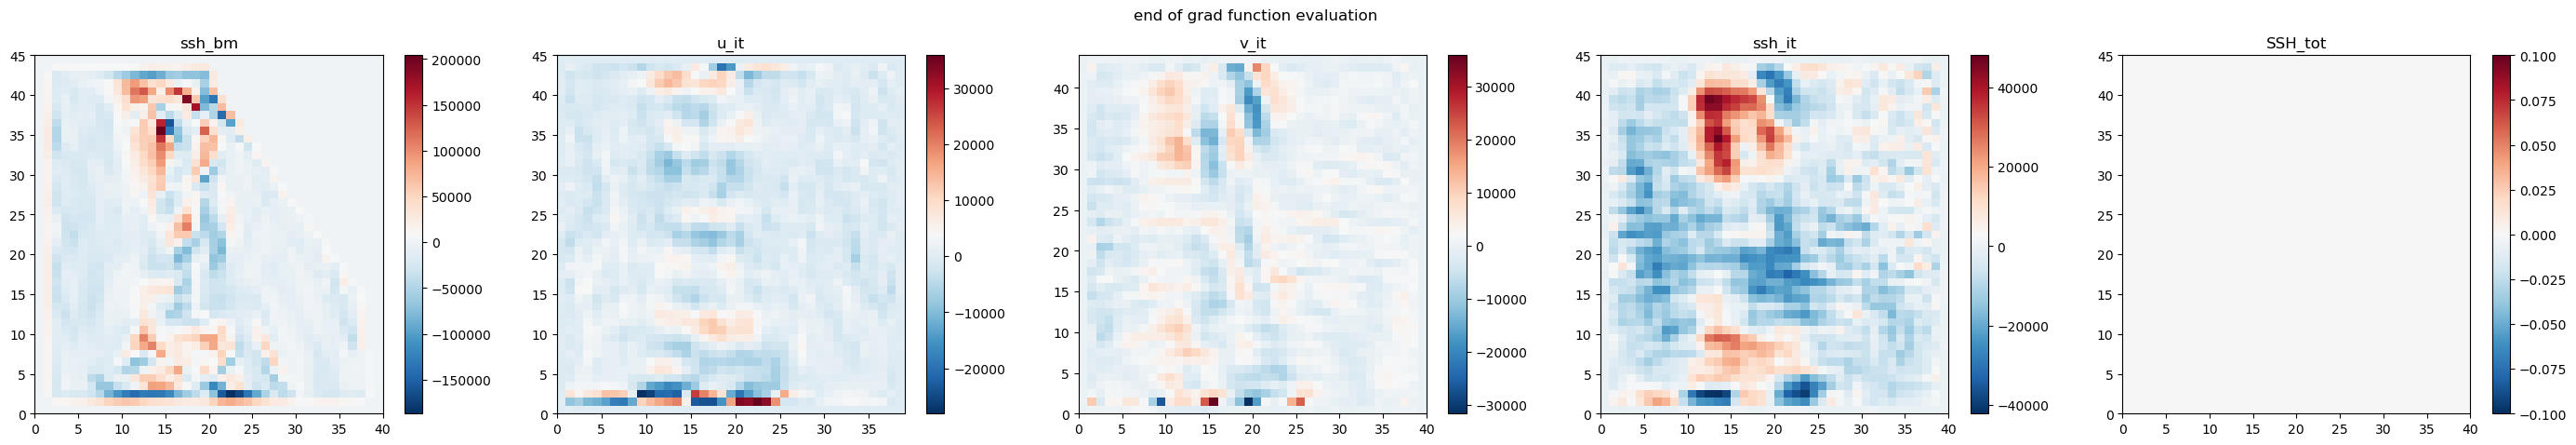


At iterate    5    f=  3.65987D+06    |proj g|=  8.95277D+04


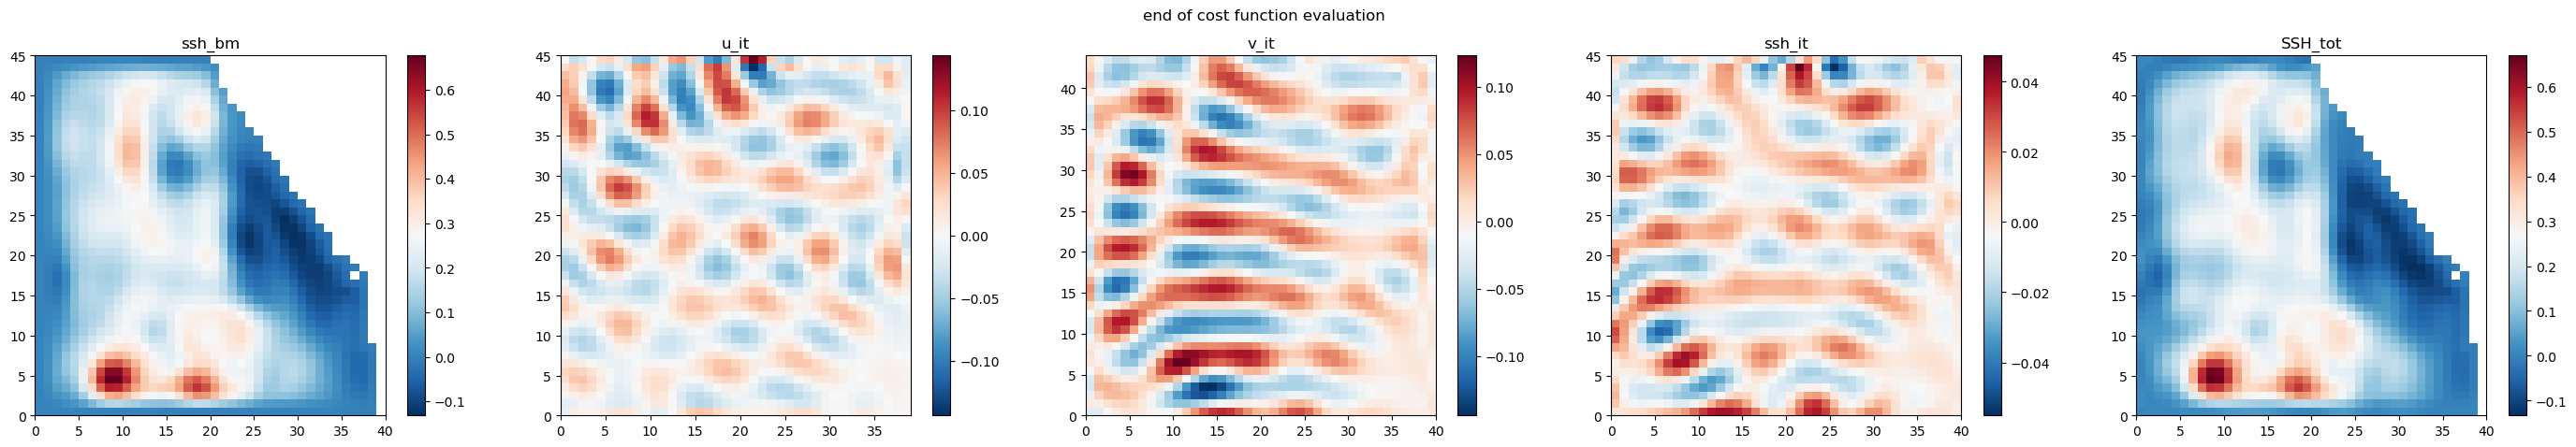

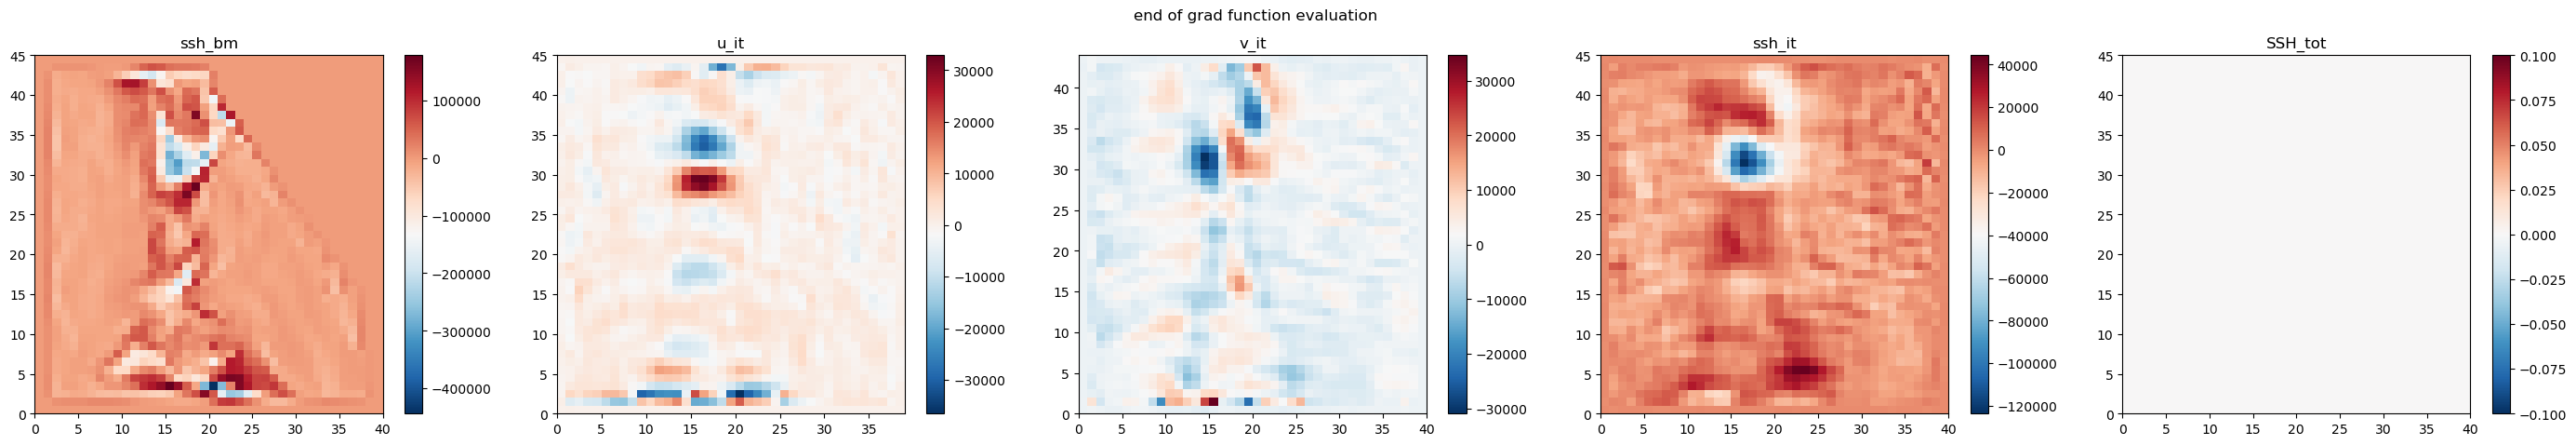


At iterate    6    f=  3.11070D+06    |proj g|=  1.07017D+05


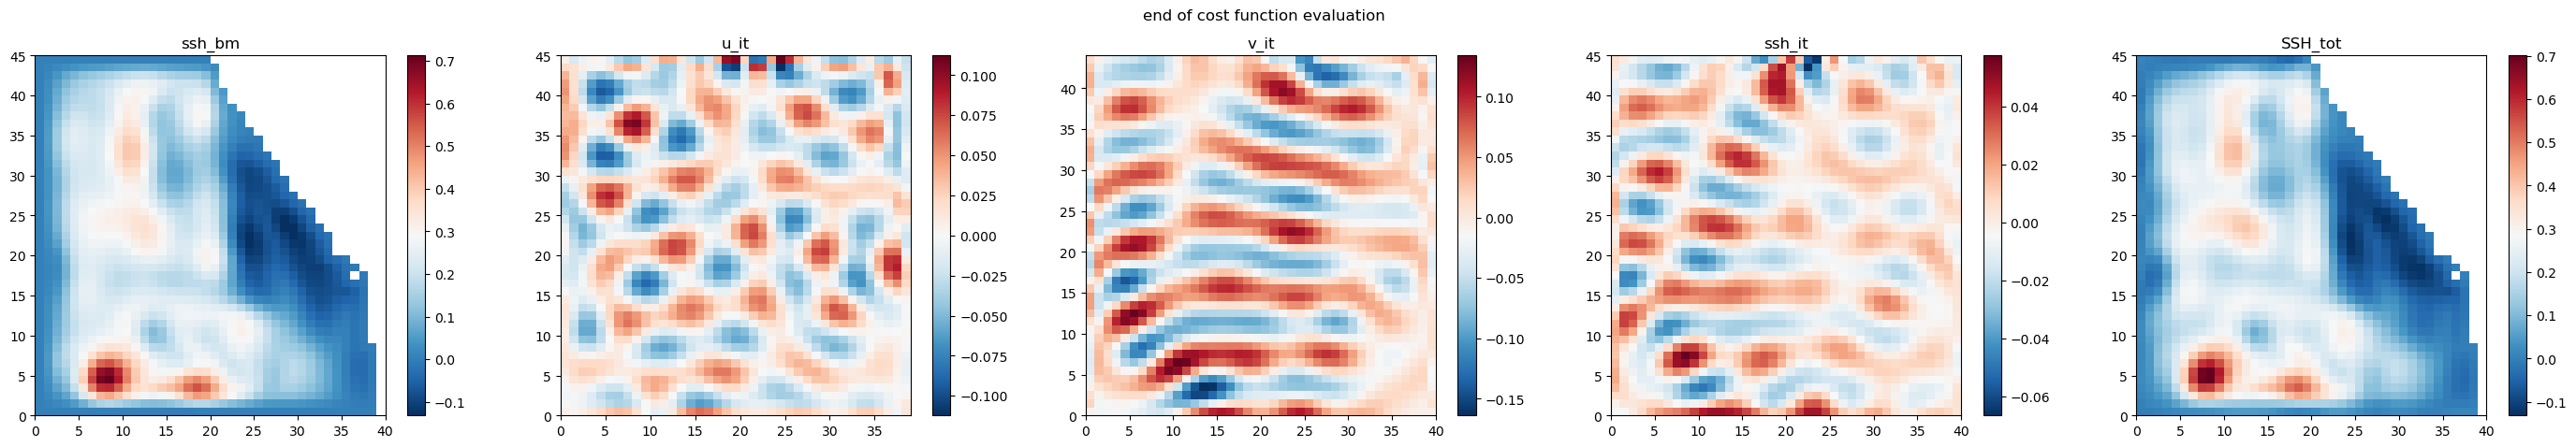

In [12]:
from src import inv as inv
inv.Inv(config,State,Model,dict_obs=dict_obs,Obsop=Obsop,Basis=Basis,Bc=Bc)

## Diagnostics

In [ ]:
from src import diag as diag
Diag = diag.Diag(config,State)

In [ ]:
Diag.regrid_exp()
Diag.exp_regridded.ssh[-1].plot()

In [ ]:
Diag.rmse_based_scores(plot=True)

In [ ]:
Diag.psd_based_scores(plot=True)

In [ ]:
Diag.movie(framerate=12,clim=(0,.5),range_err=.2)

In [ ]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))

In [ ]:
Leaderboard = Diag.Leaderboard()
Leaderboard